# Importing the required libraries 

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from numpy import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# Loading the training Dataset

In [2]:
data=pd.read_csv('train.csv')

# Data Preprocessing

## Creating new features

In [3]:
def addNewFeatures(data):
    # SaleCondition
    categories = ['Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial']
    for category in categories:
        data[category] = (data['SaleCondition'] == category).astype(int)
    
    # Calculating Age by subtracting YearBuilt from YrSold
    data['Age'] = data['YrSold'] - data['YearBuilt']

    # sale types
    sale_types = ['WD', 'CWD', 'VWD', 'New', 'Con', 'ConLw', 'ConLi', 'ConLd', 'COD', 'Oth']
    for sale_type in sale_types:
        data[sale_type] = (data['SaleType'] == sale_type).astype(int)
    
    # house styles
    house_styles = ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl']
    for style in house_styles:
        data[style] = (data['HouseStyle'] == style).astype(int)
    
    # utilities
    Utilities=['AllPub', 'NoSewr', 'NoSeWa', 'ELO']
    for i in Utilities:
        data[i]=(data['Utilities']==i).astype(int)
    
addNewFeatures(data)

## Setting The independent and dependent variables

In [4]:
features=['LotArea', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF1', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'GarageArea','MasVnrArea' ,'WoodDeckSF', 'OpenPorchSF', 'BedroomAbvGr', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial','Age','WD', 'CWD', 'VWD', 'New', 'Con', 'ConLw', 'ConLi', 'ConLd', 'COD', 'Oth', '1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl','AllPub', 'NoSewr', 'NoSeWa', 'ELO']
x=data[features]
y=data['SalePrice']

## Visualization & Outlier Detection

### Box Plot

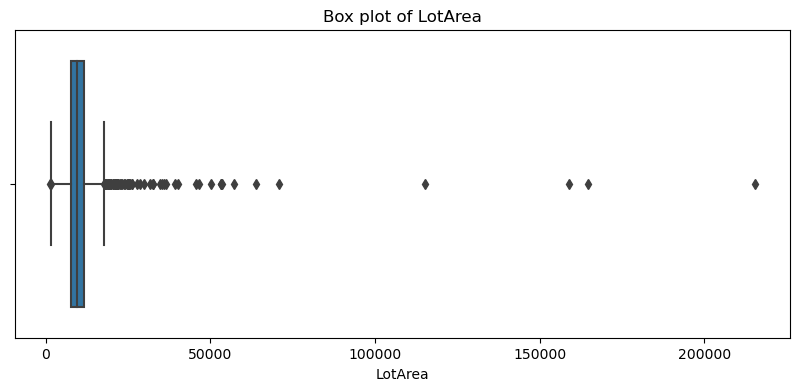

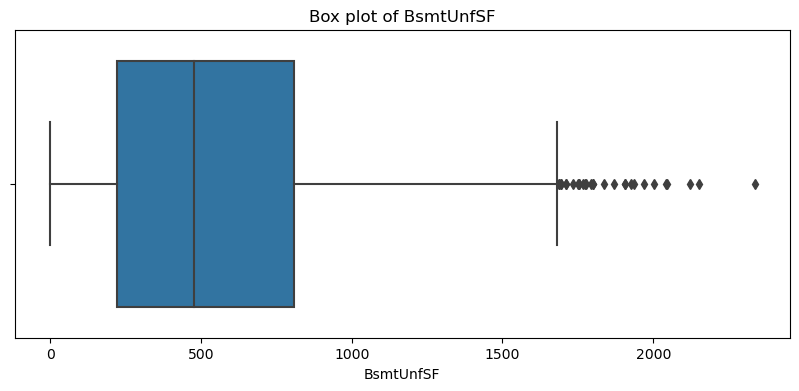

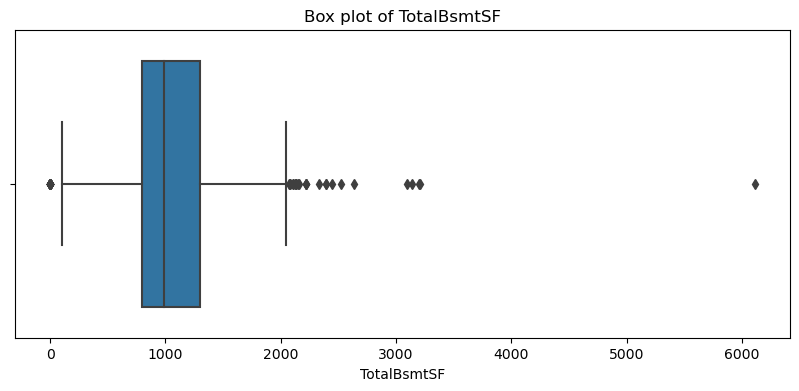

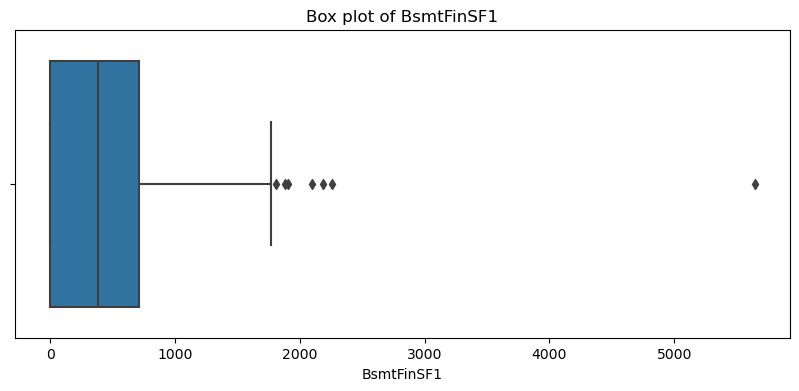

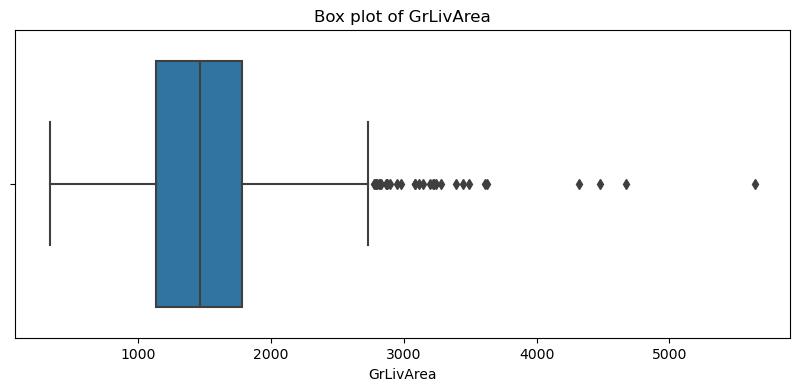

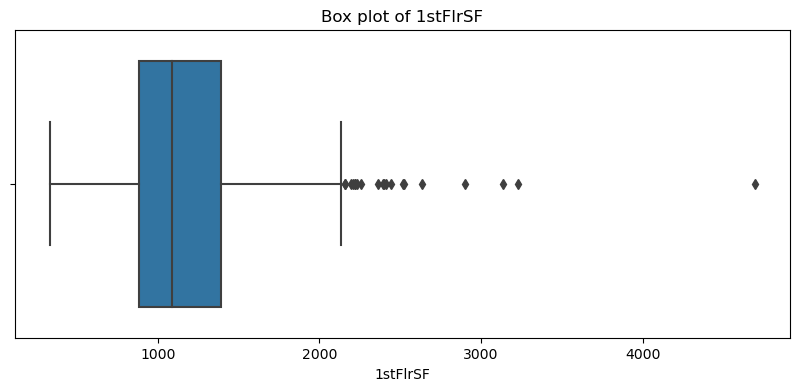

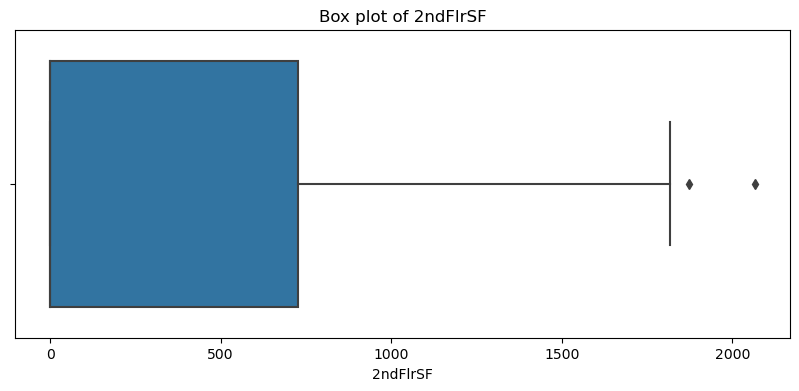

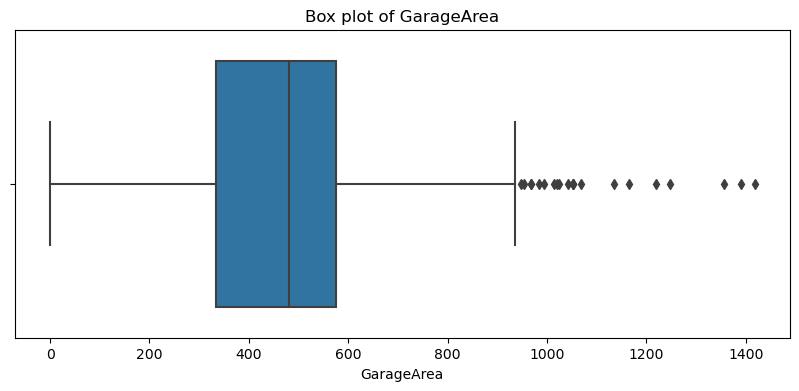

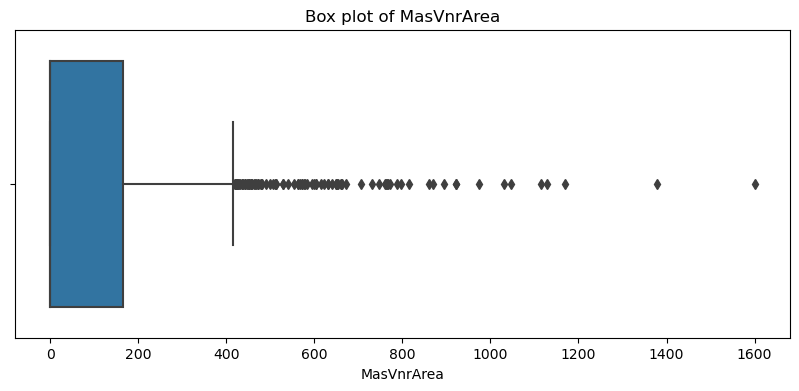

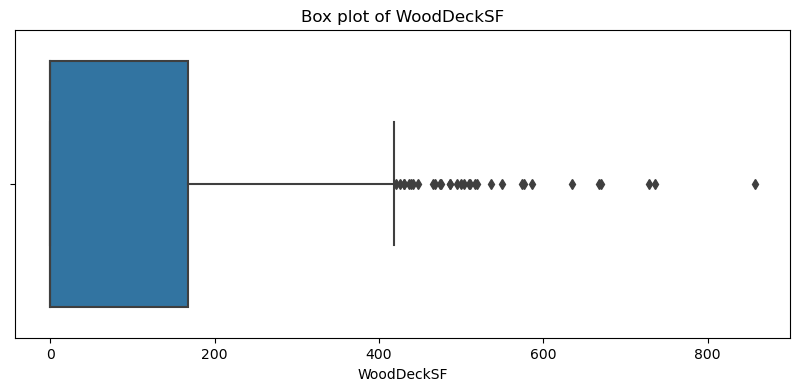

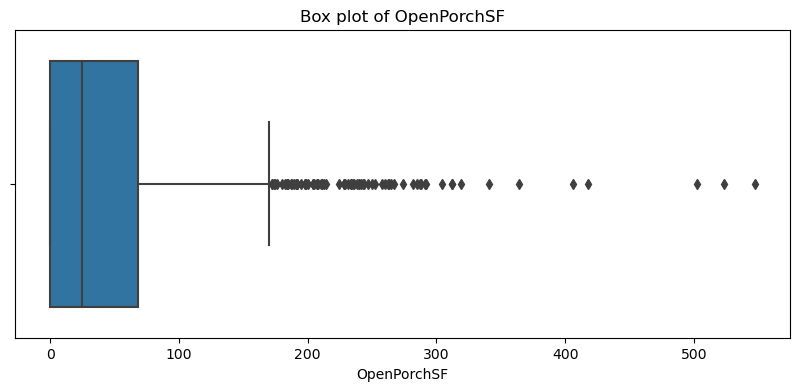

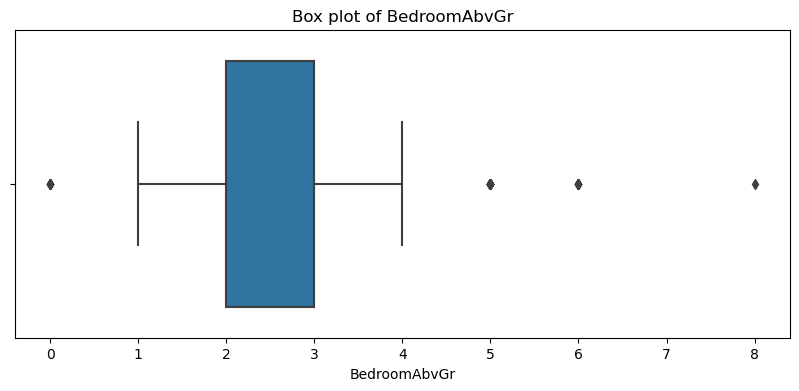

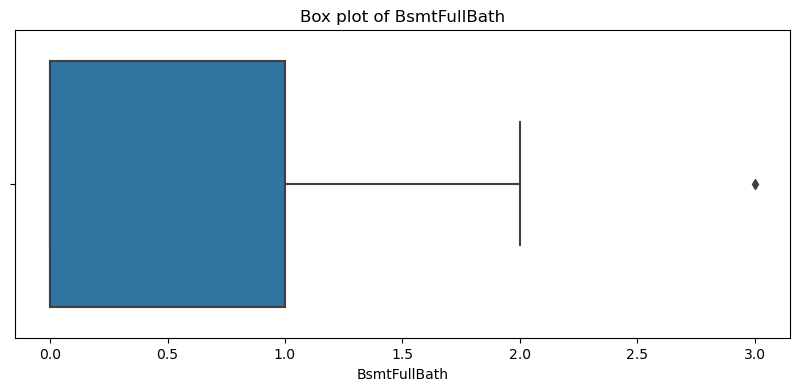

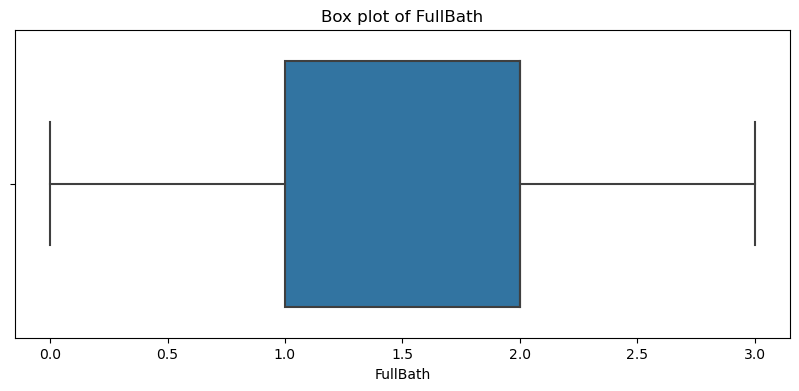

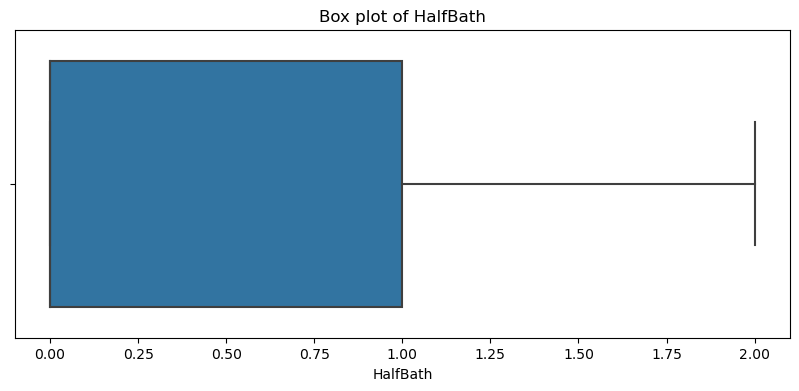

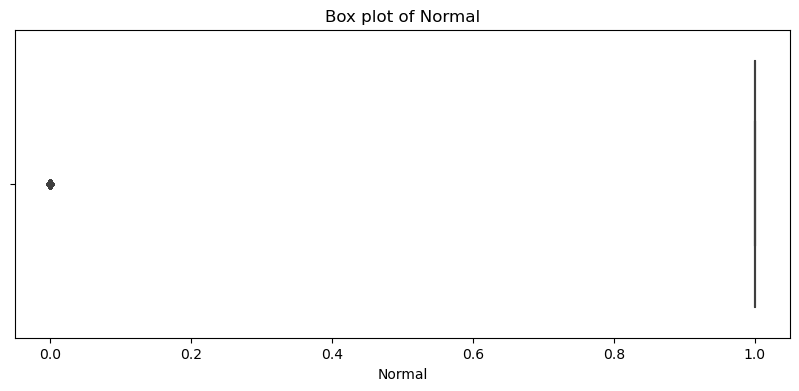

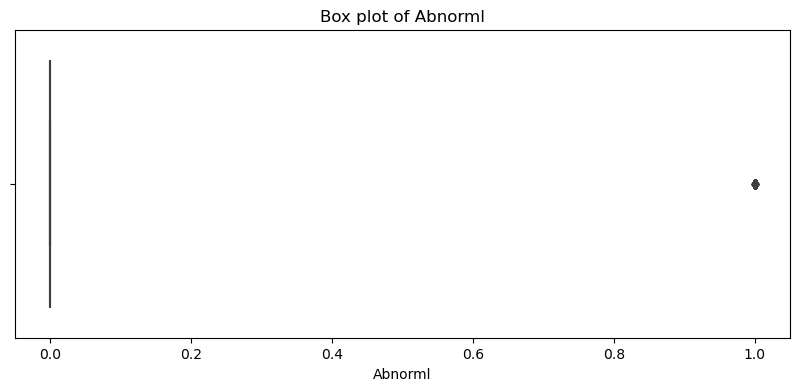

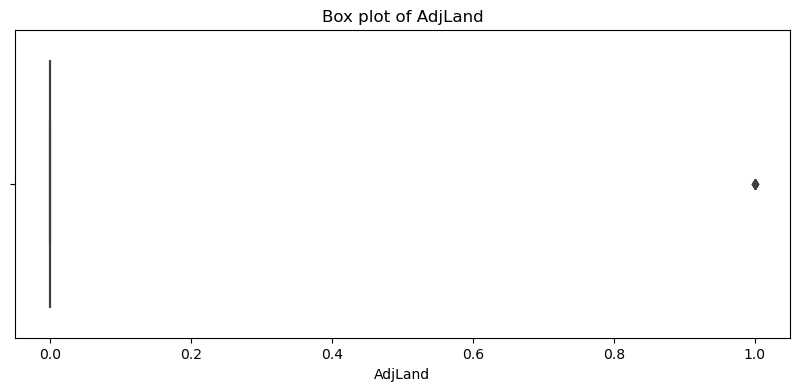

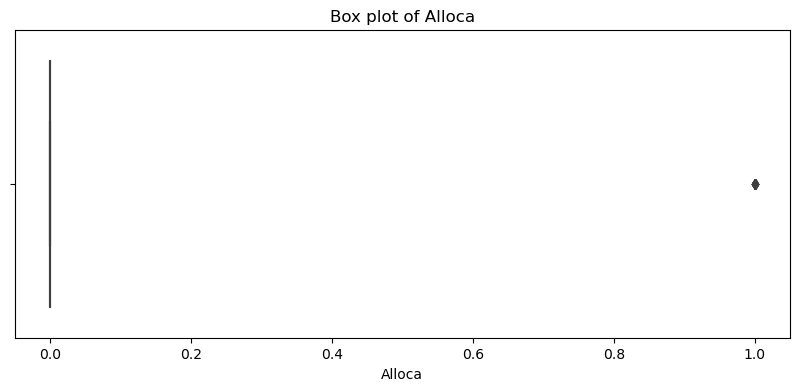

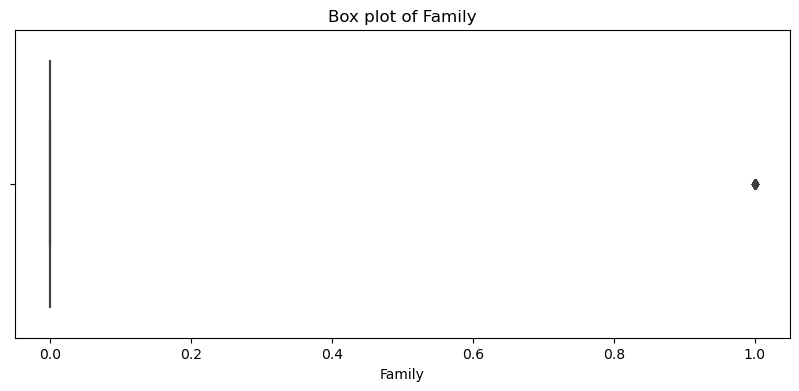

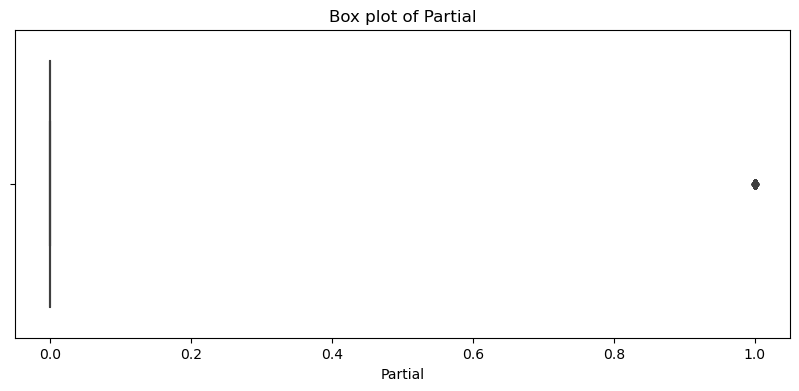

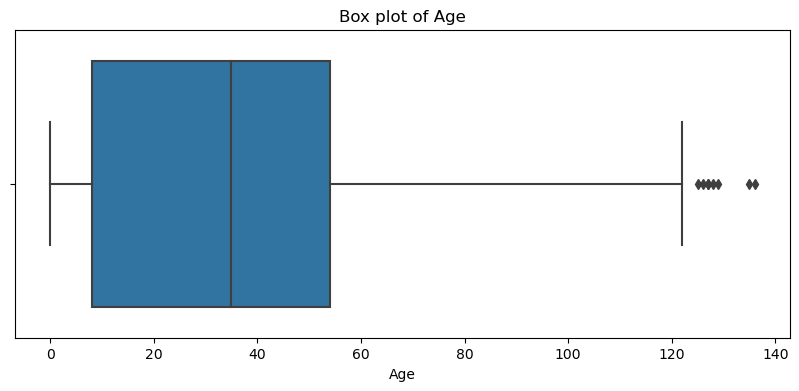

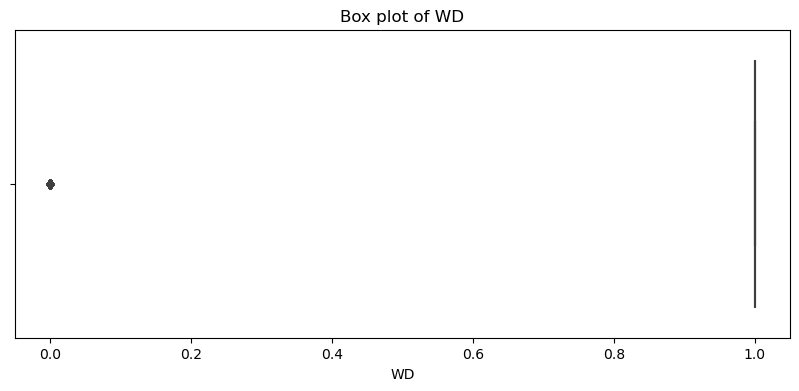

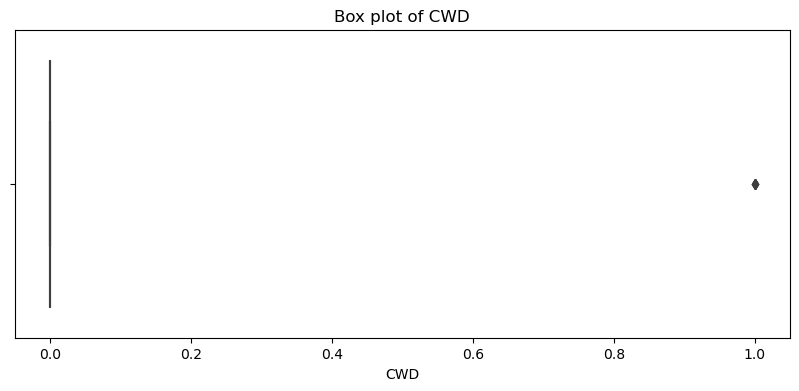

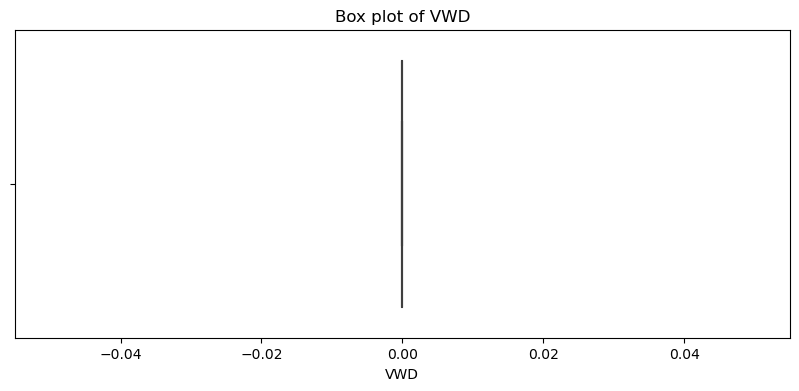

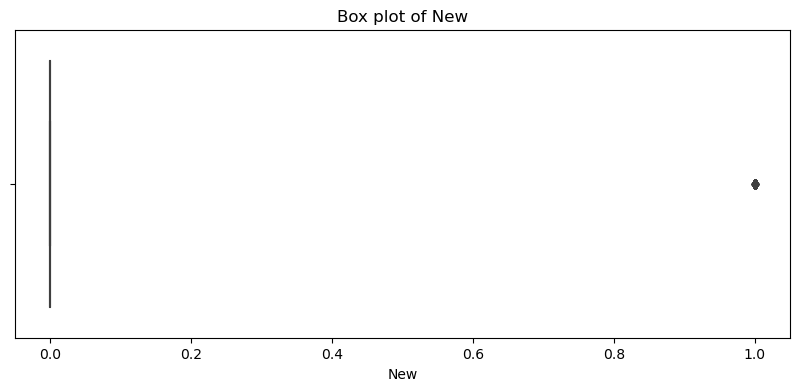

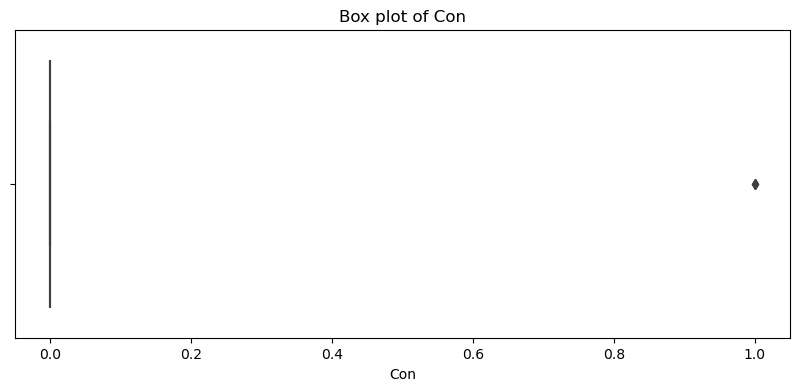

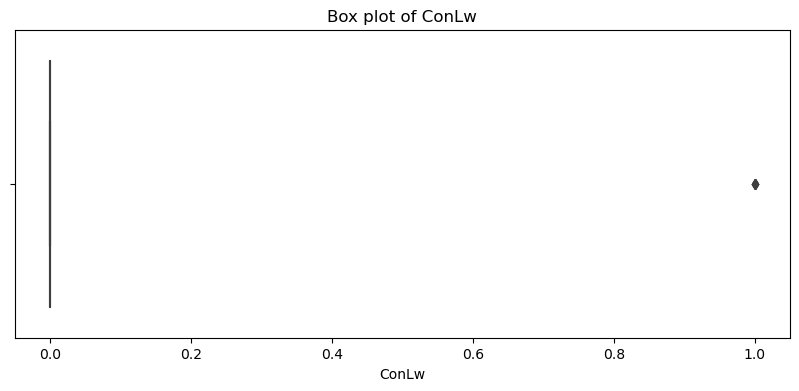

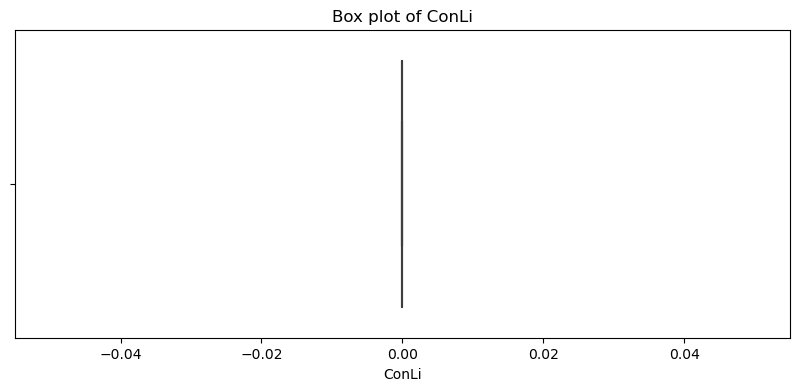

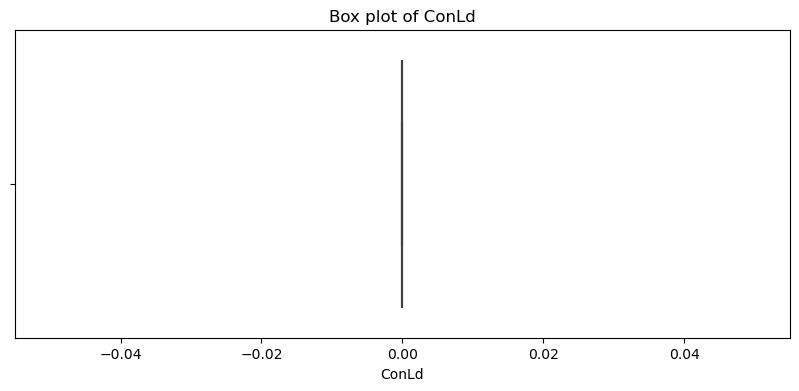

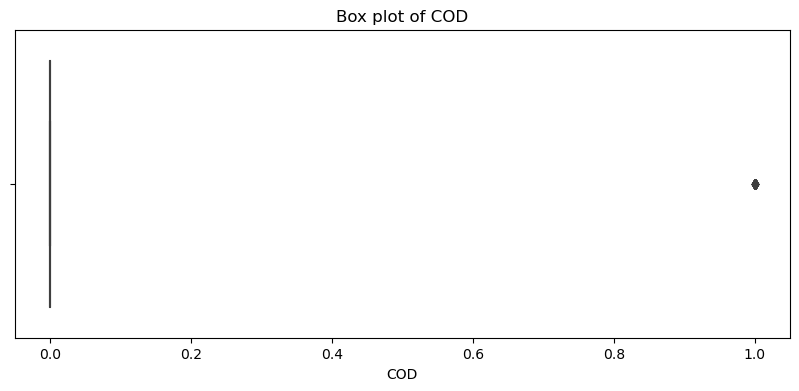

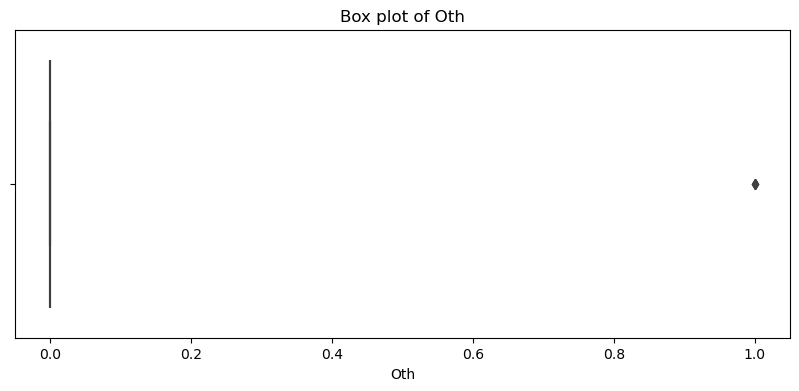

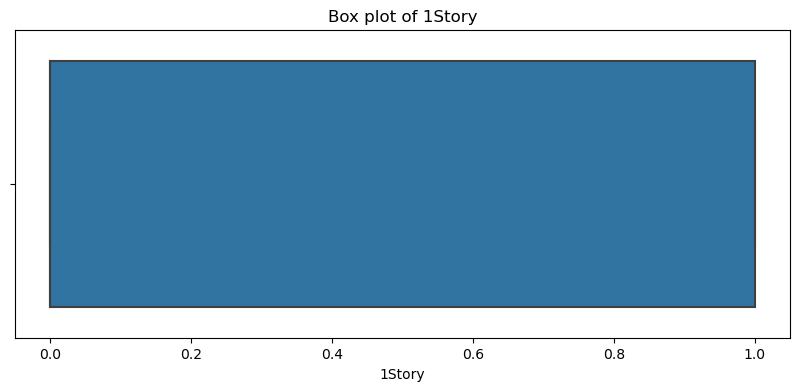

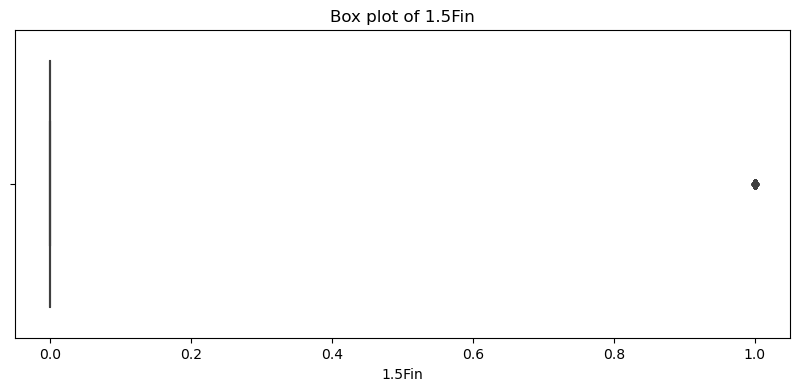

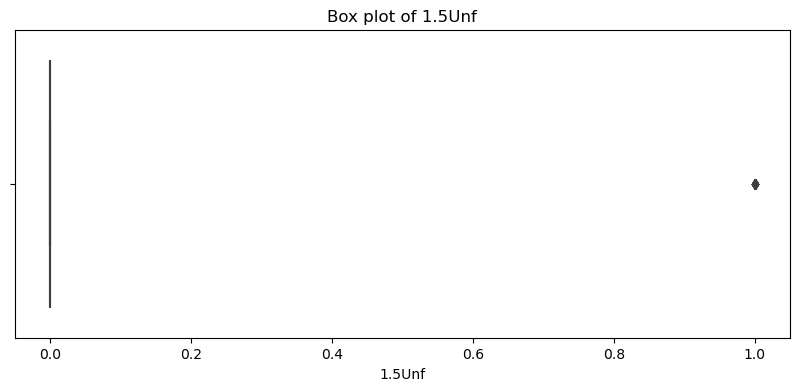

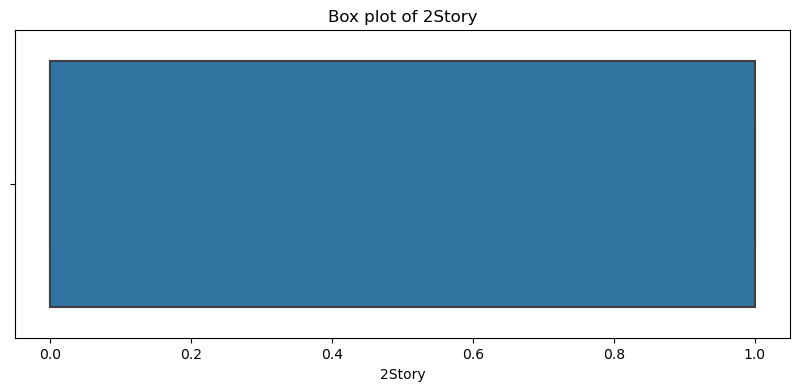

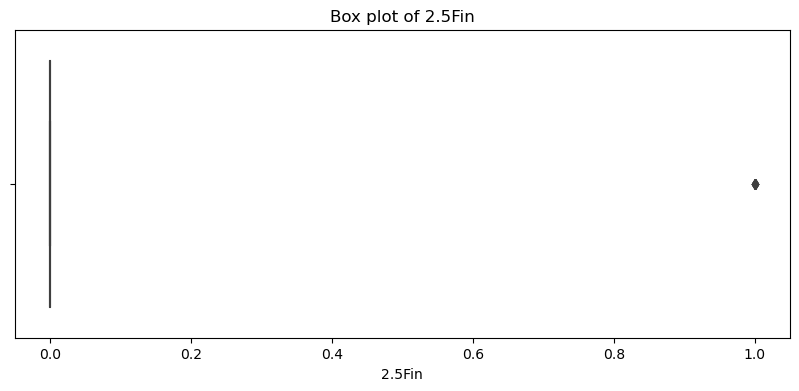

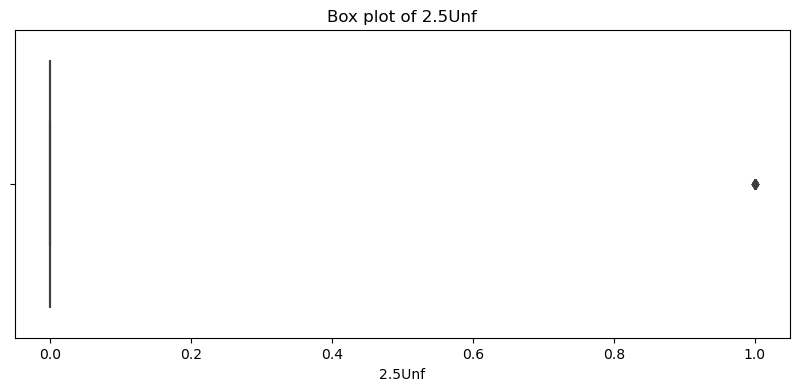

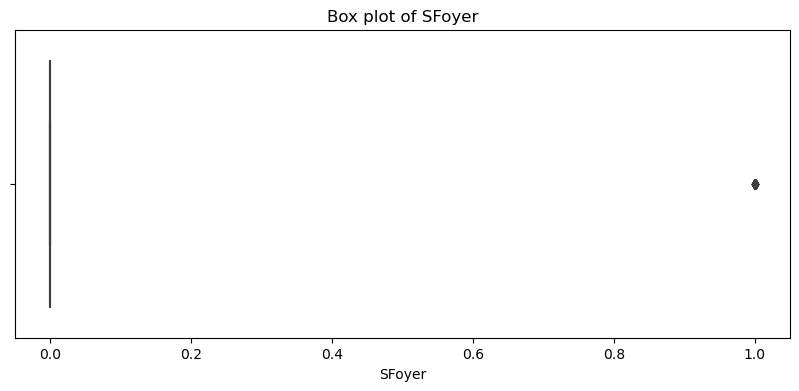

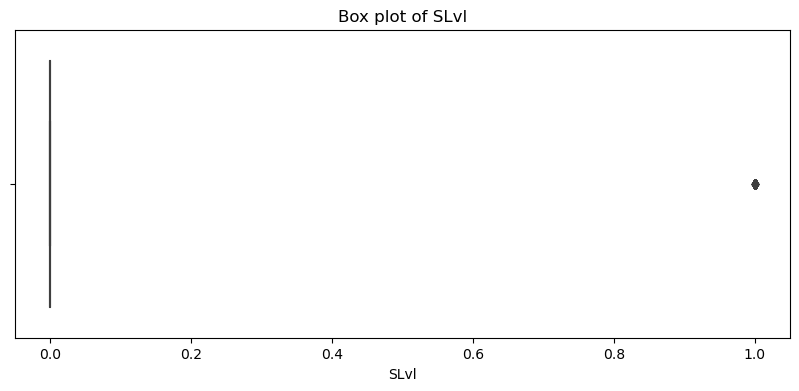

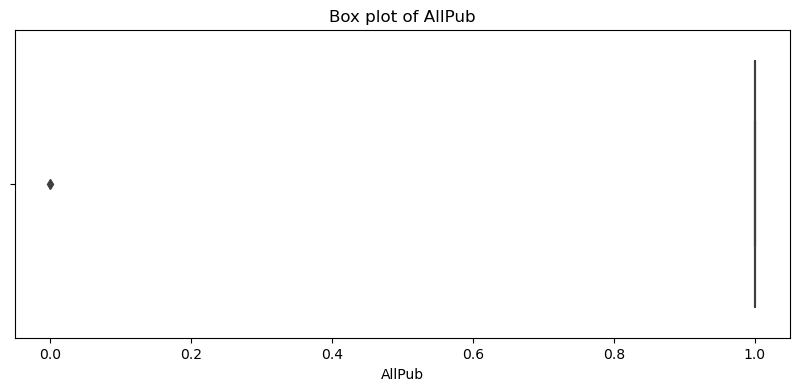

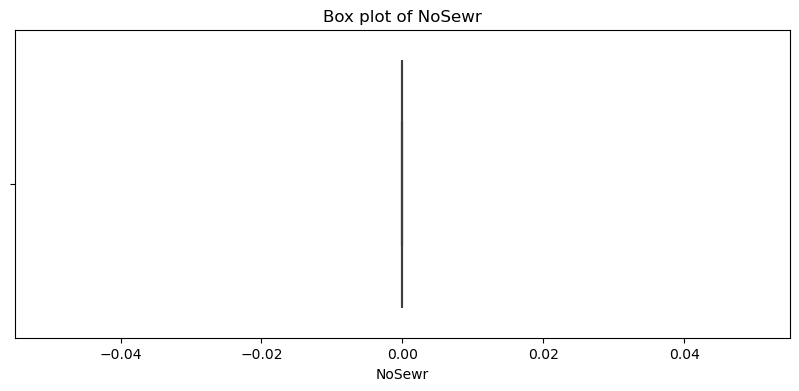

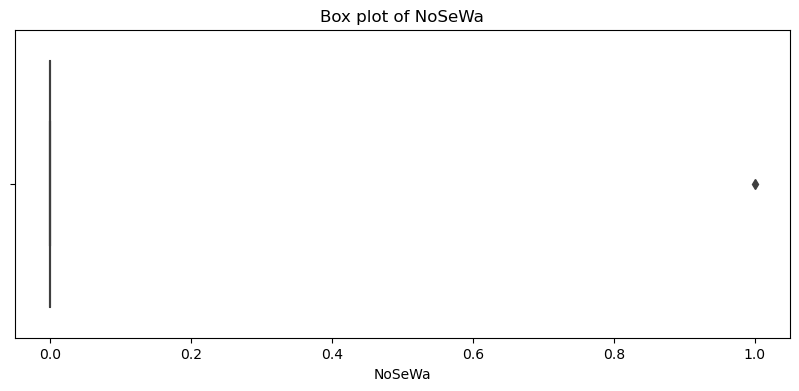

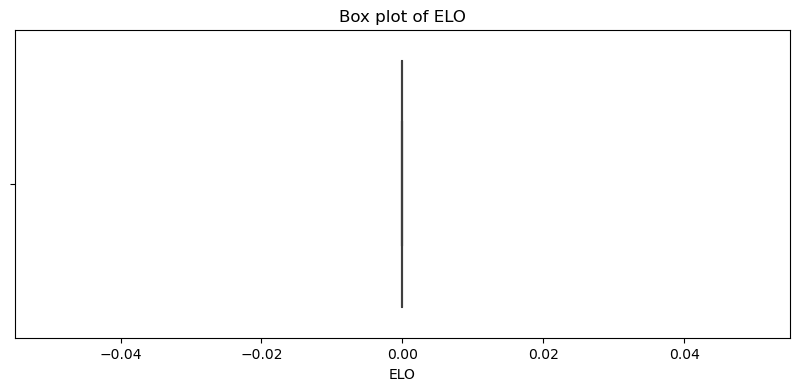

In [5]:
# Box plots for each variable
for column in features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

### Removing outliers manually

In [6]:
data = data[
    (data['LotArea'] <= 20000) &
    (data['BsmtUnfSF'] <= 1700) &
    (data['TotalBsmtSF'] <= 2000) &
    (data['BsmtFinSF1'] <= 1700) &
    (data['BsmtFinSF2'] <= 1400) &
    (data['GrLivArea'] <= 3000) &
    (data['1stFlrSF'] <= 2200) &
    (data['2ndFlrSF'] <= 2000) &
    (data['GarageArea'] <= 1000) &
    (data['WoodDeckSF'] <= 450) &
    (data['OpenPorchSF'] <= 180) &
    (data['PoolArea'] <= 400) &
    (data['BedroomAbvGr'] <= 4.5) &
    (data['BedroomAbvGr'] >= 0.5) &
    (data['BsmtFullBath'] <= 2.5) &
    (data['BsmtHalfBath'] <= 1)
]

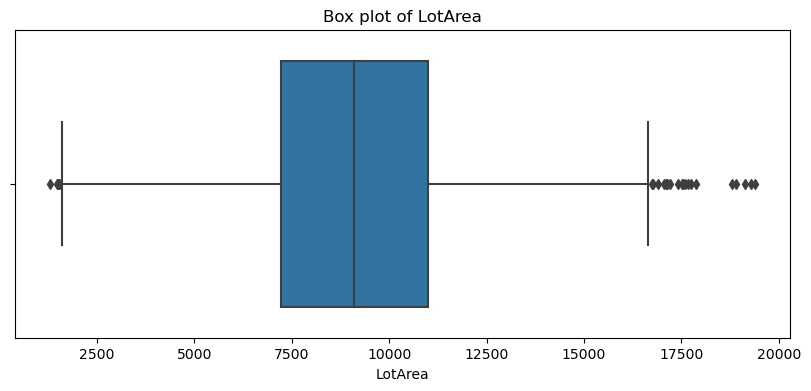

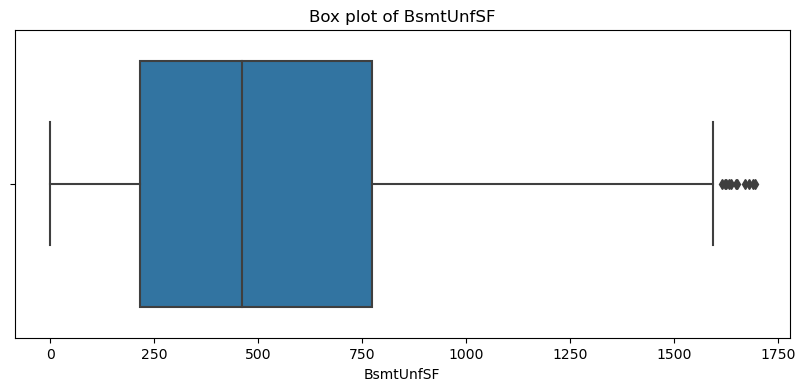

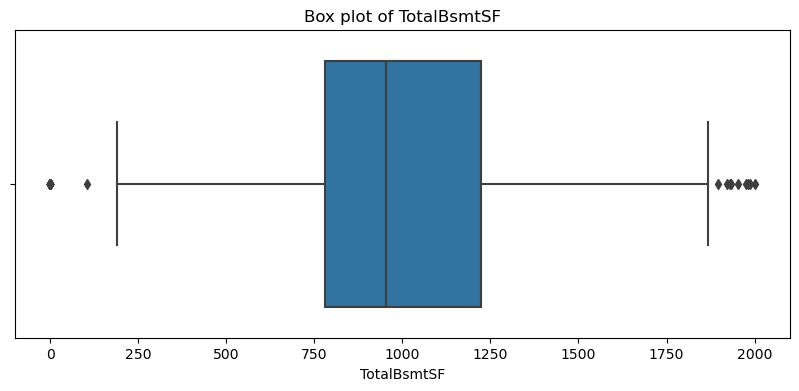

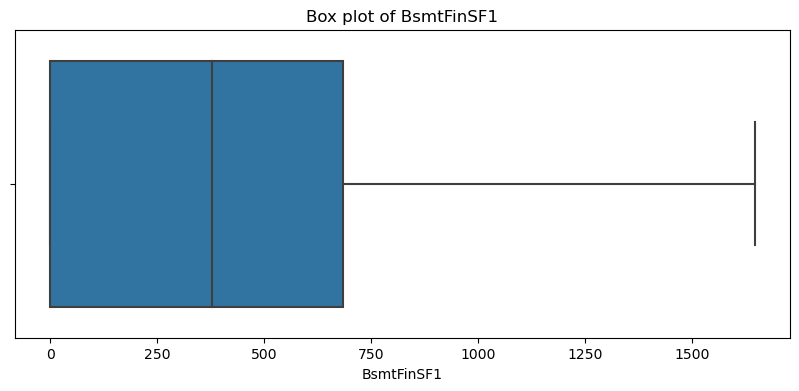

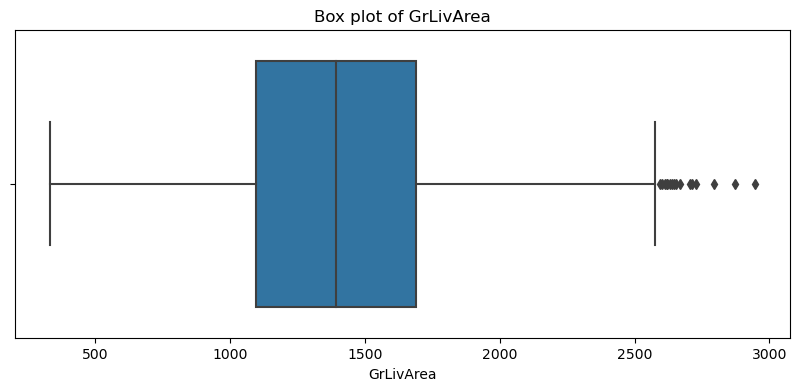

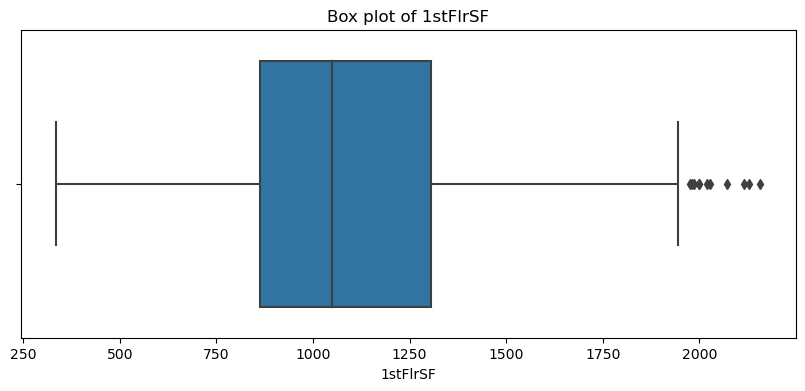

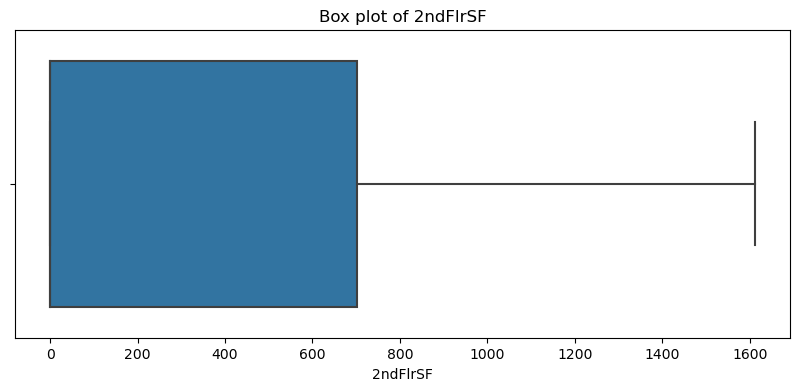

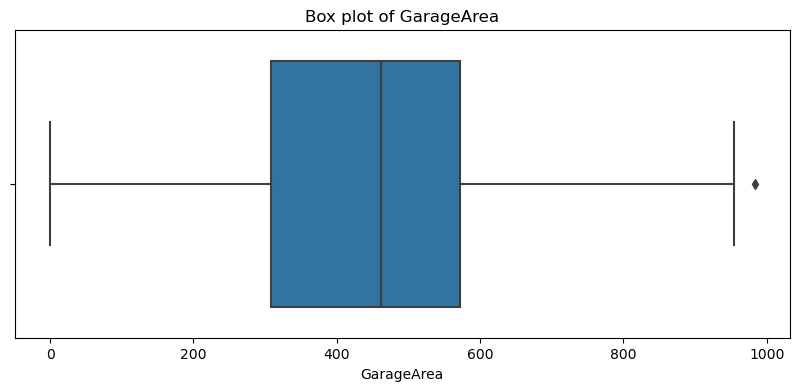

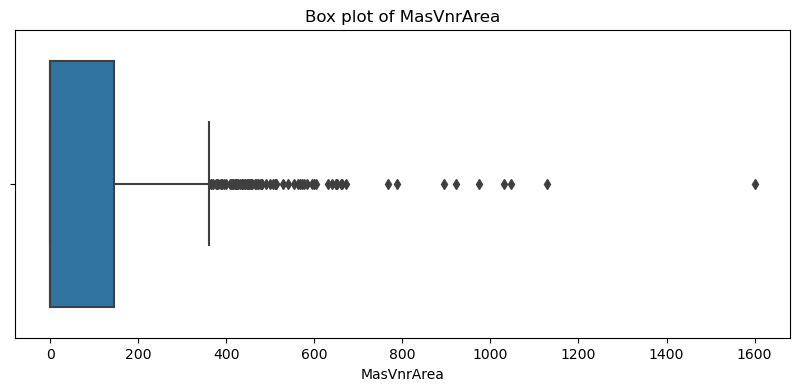

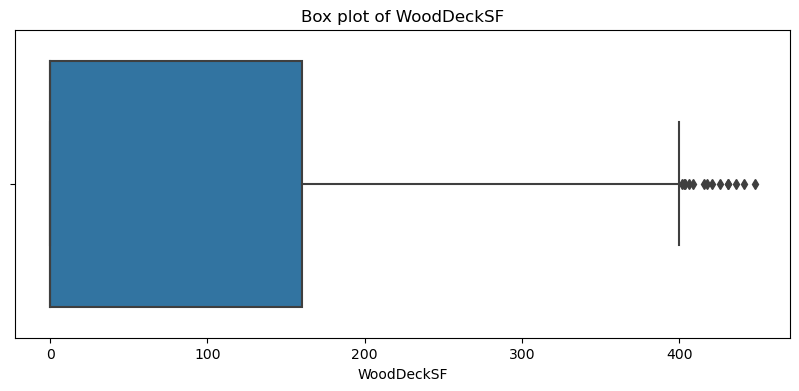

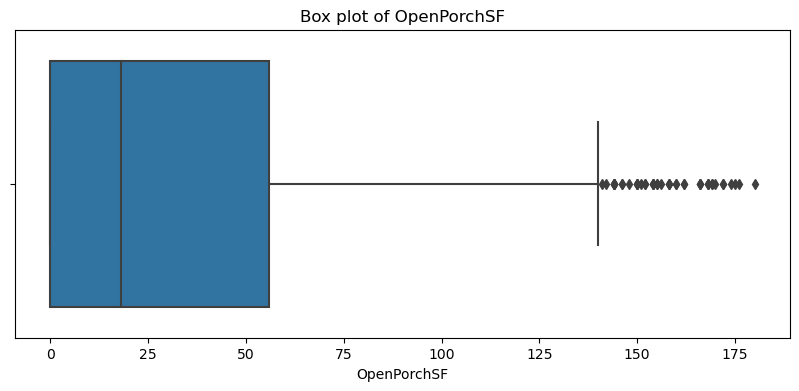

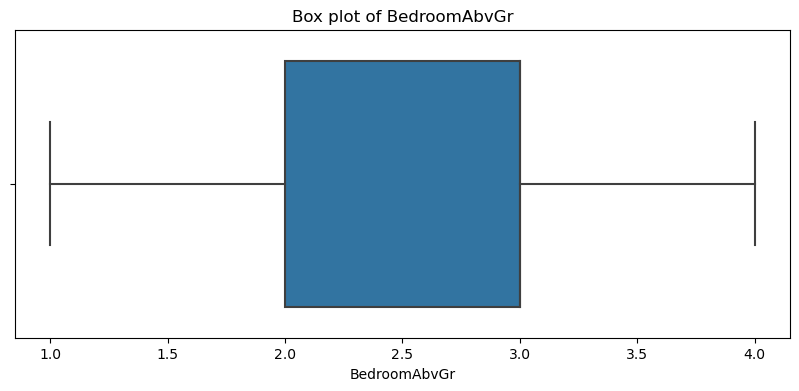

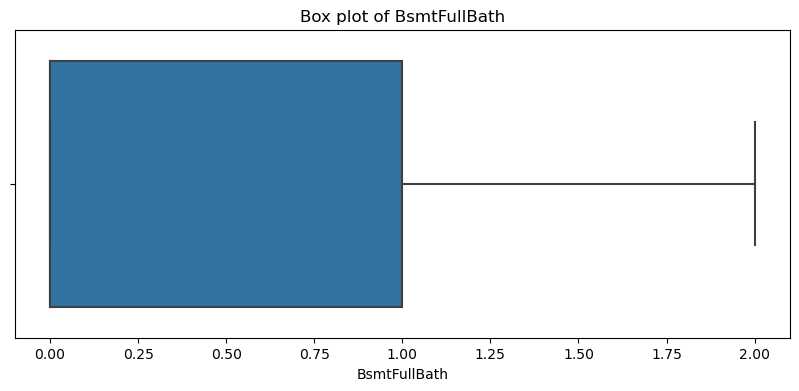

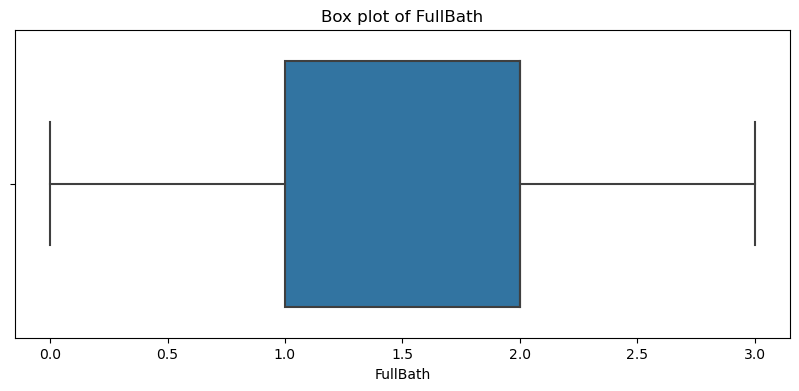

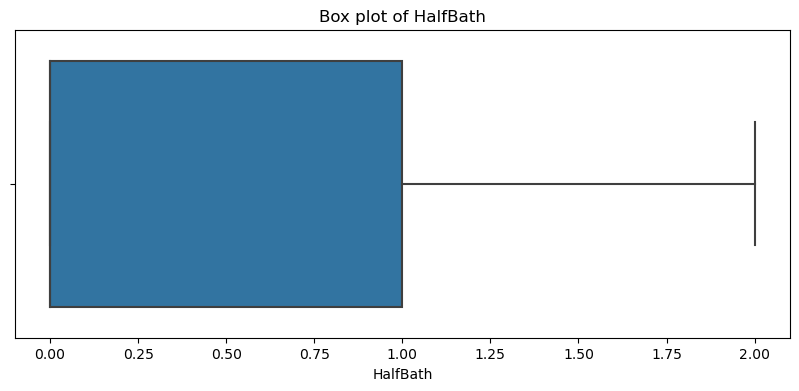

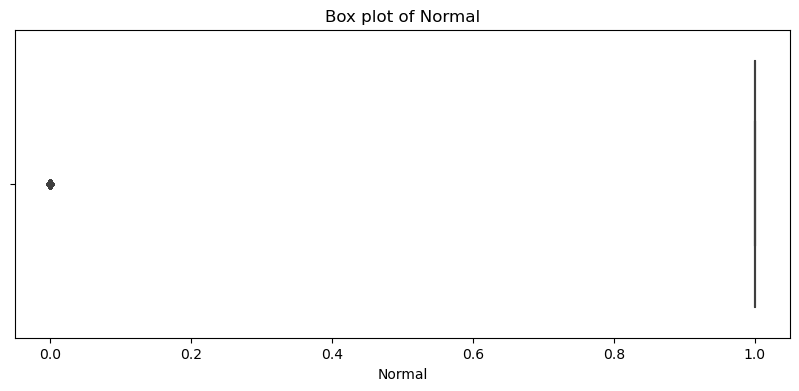

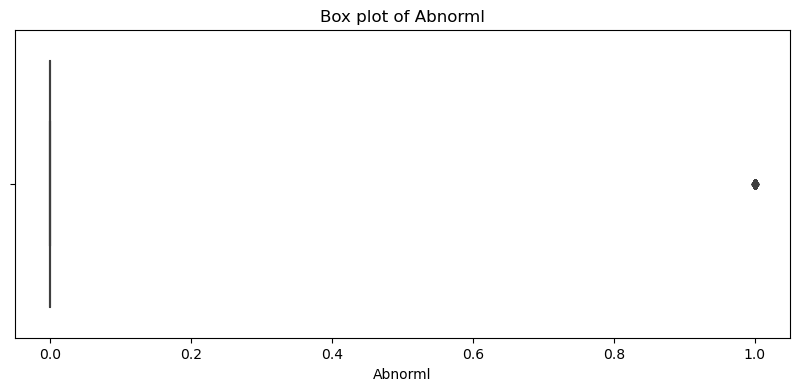

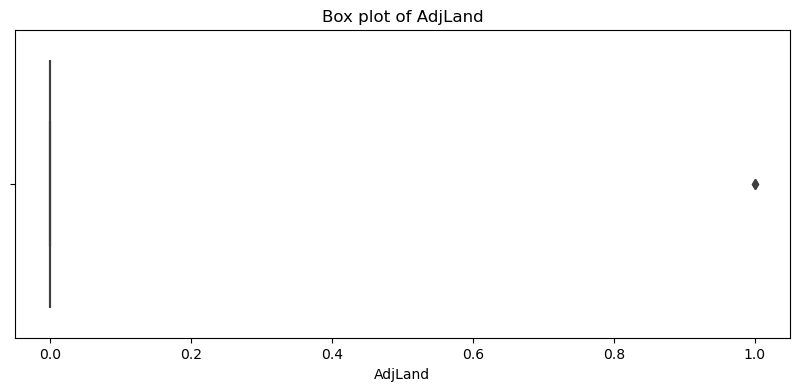

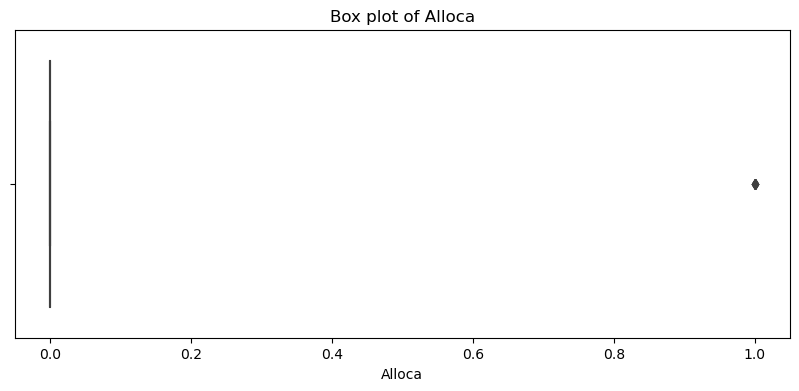

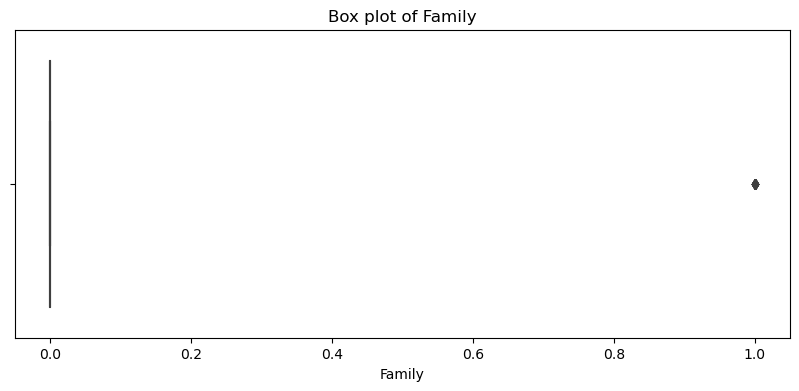

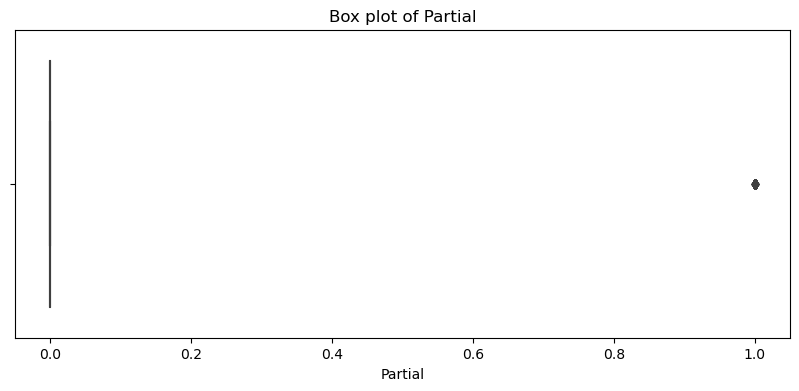

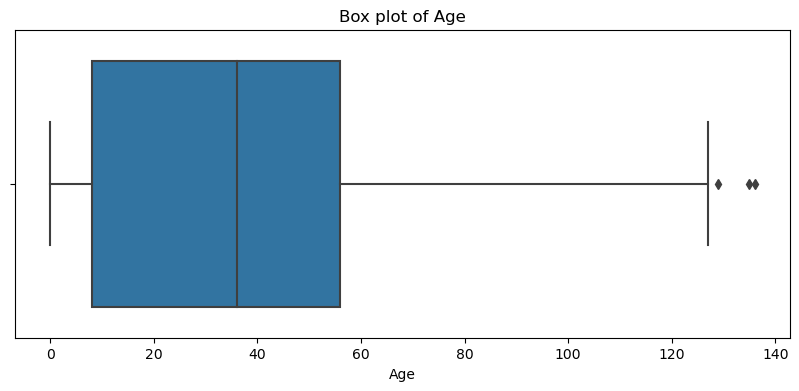

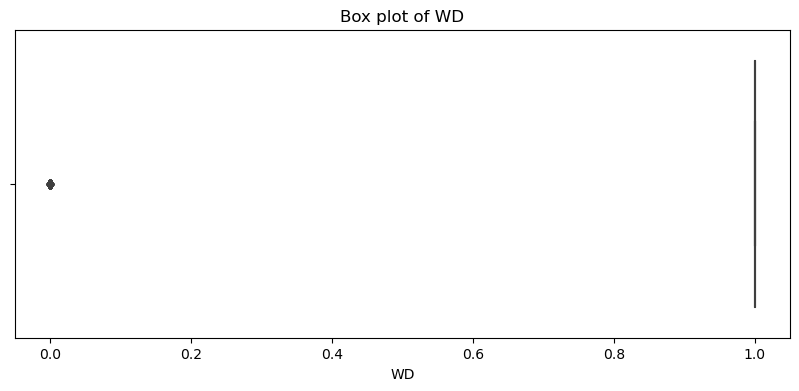

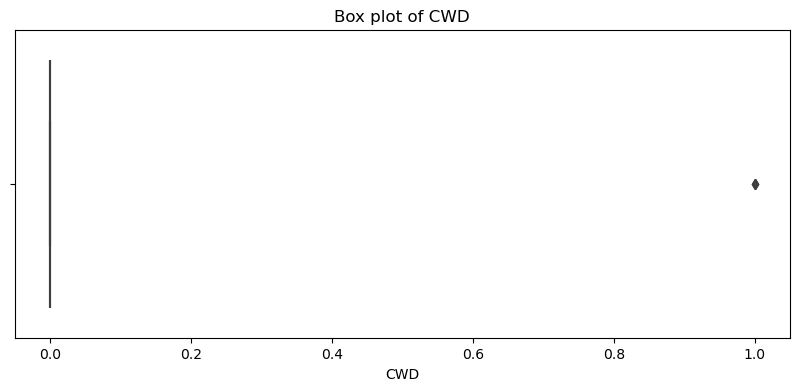

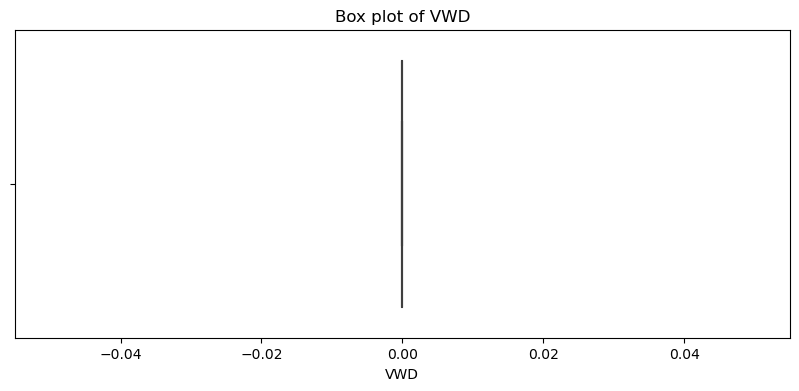

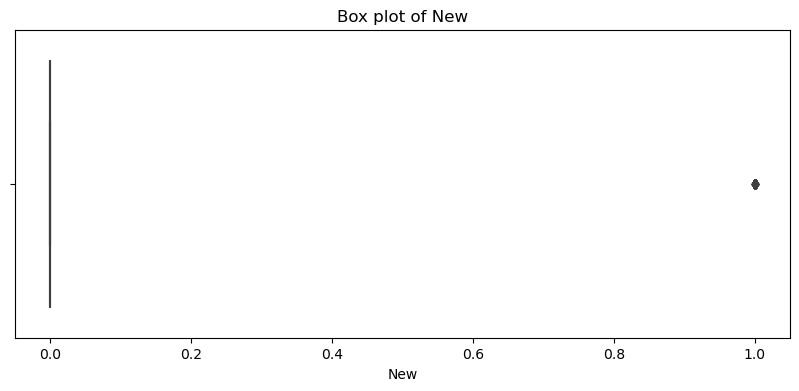

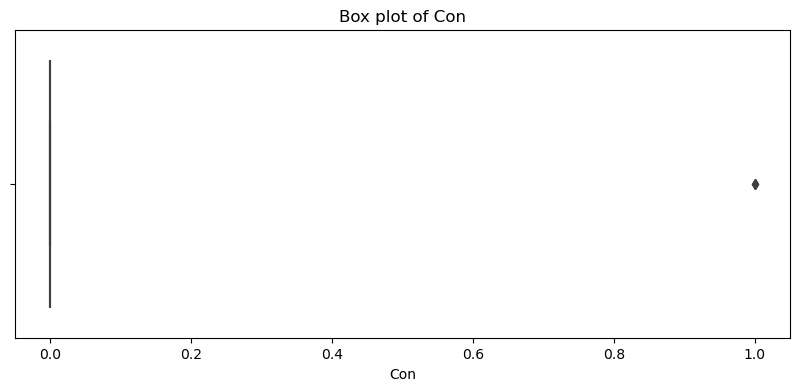

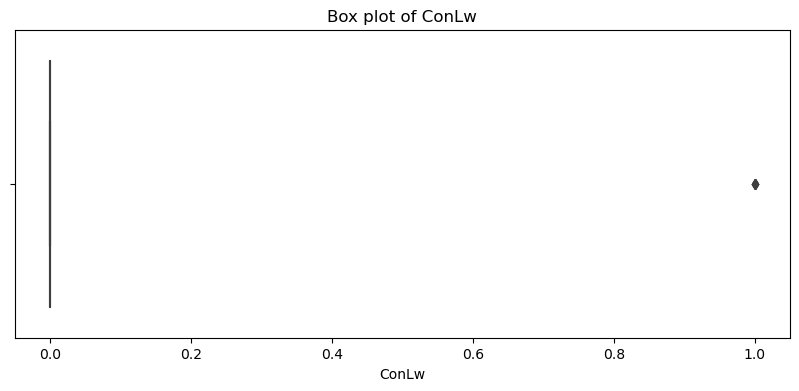

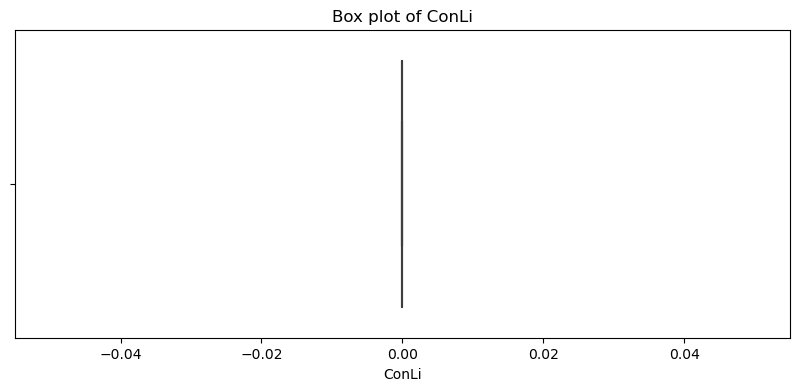

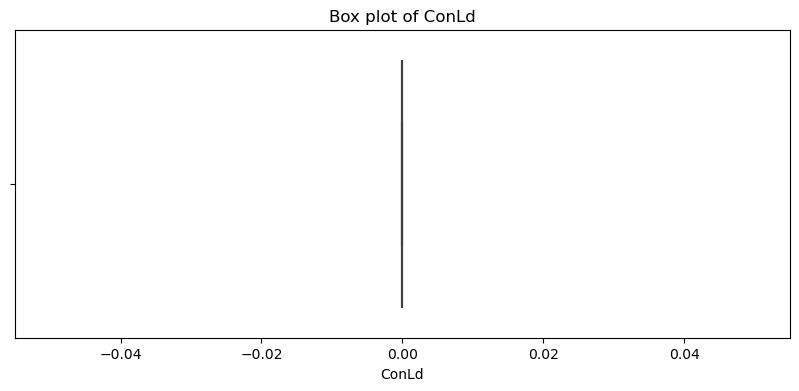

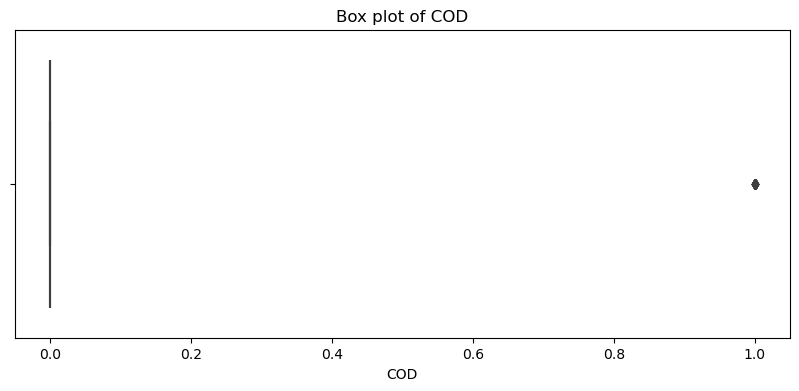

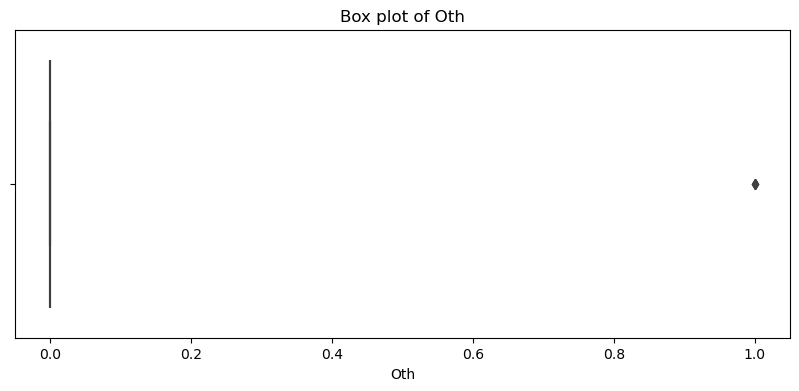

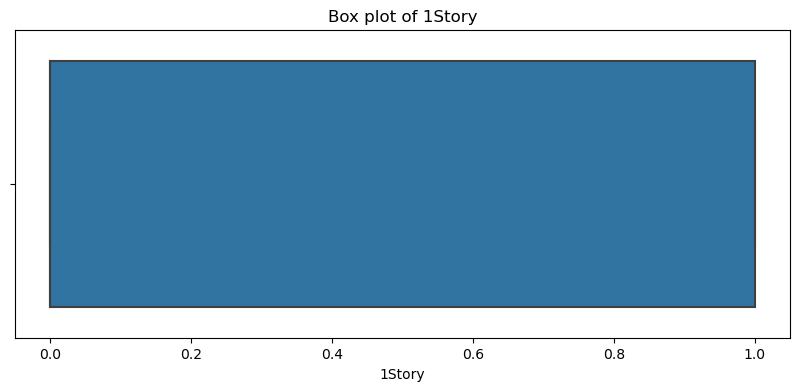

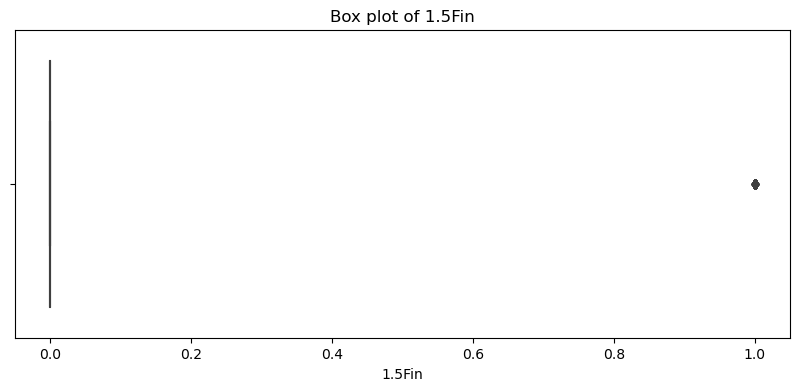

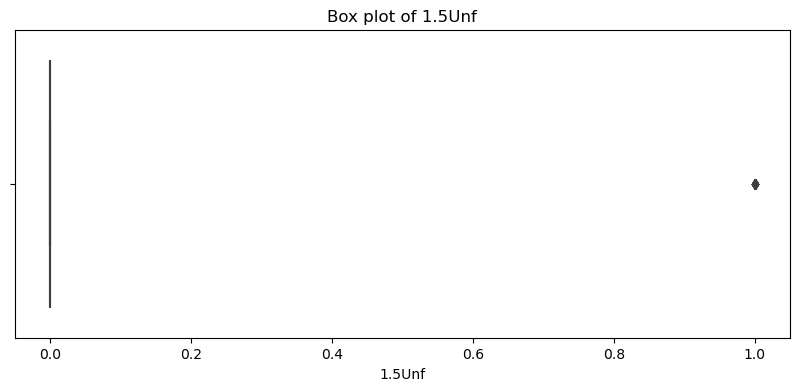

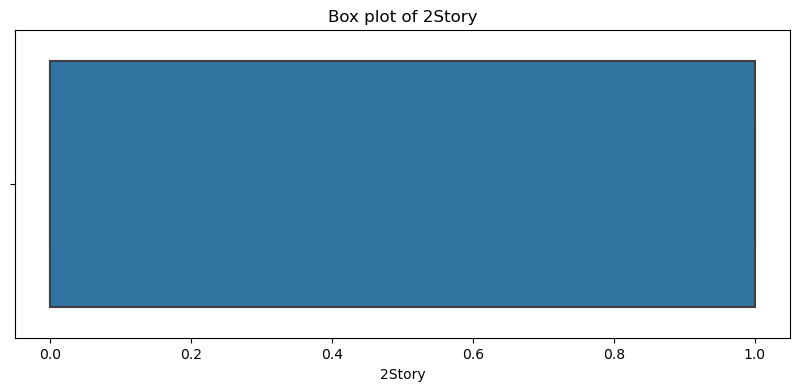

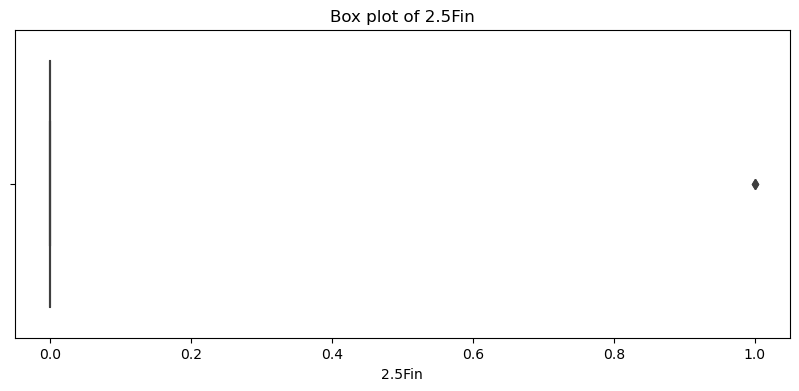

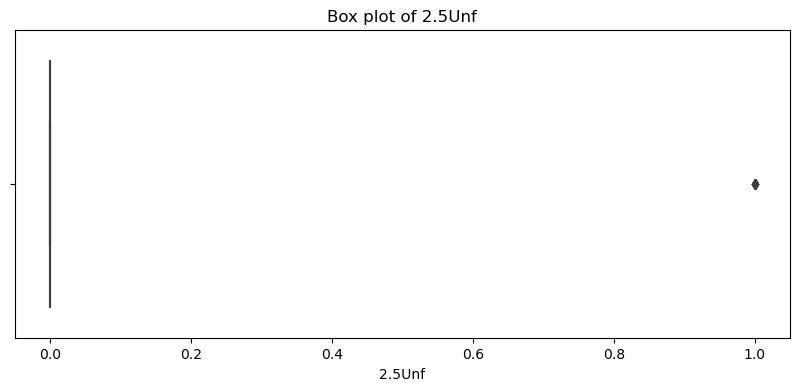

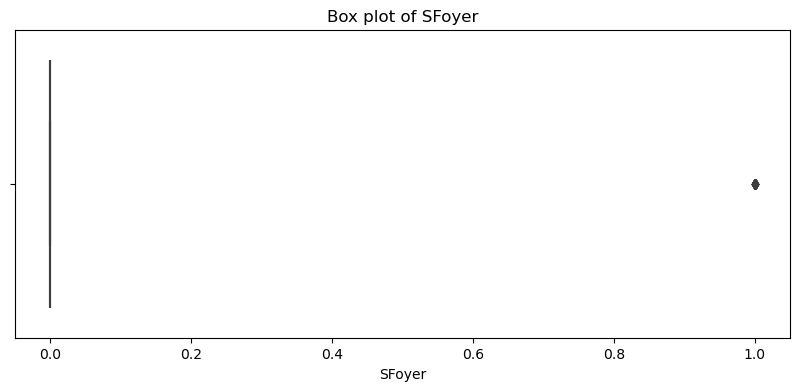

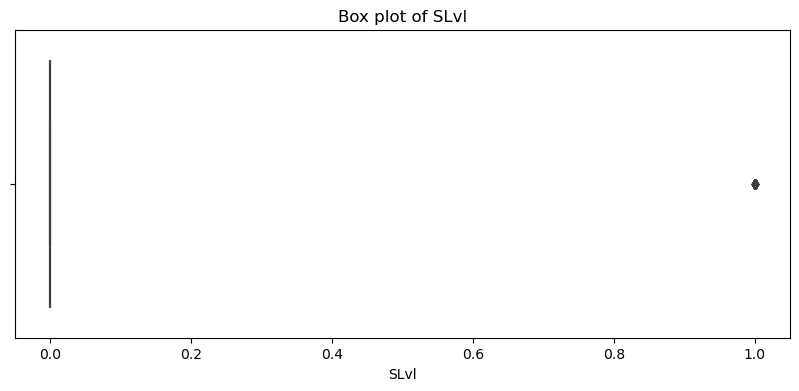

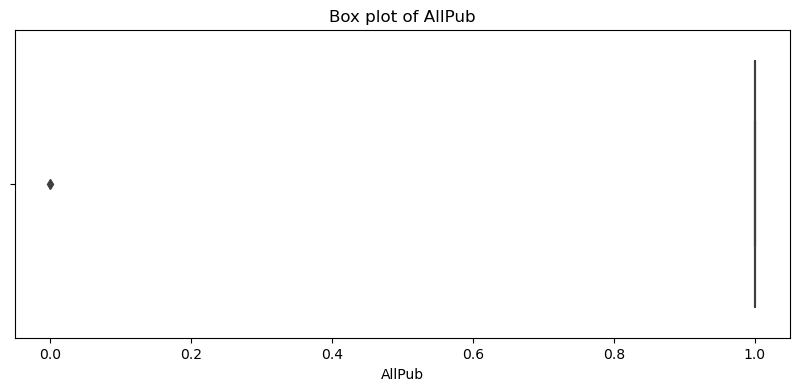

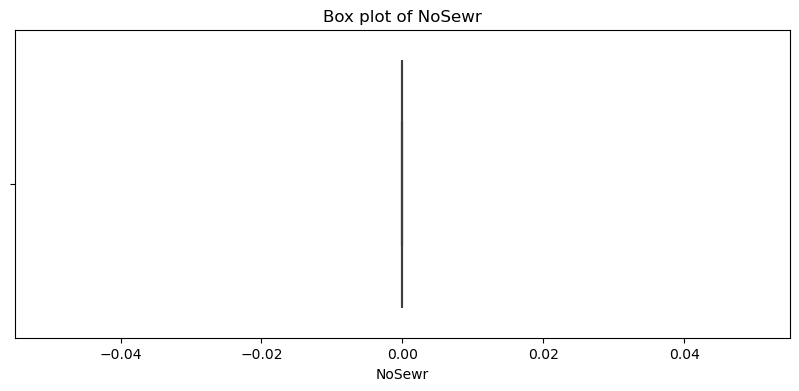

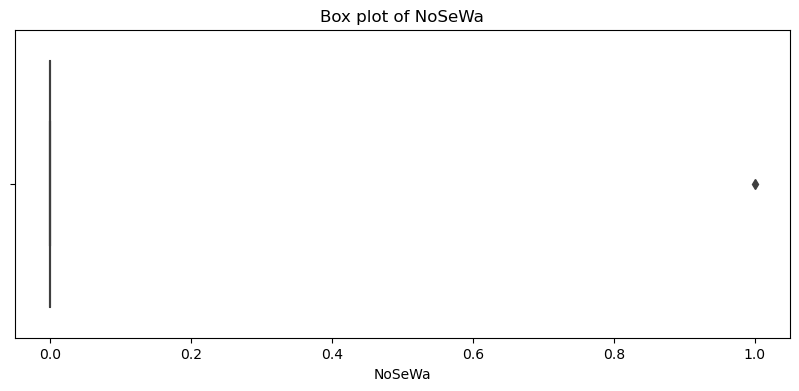

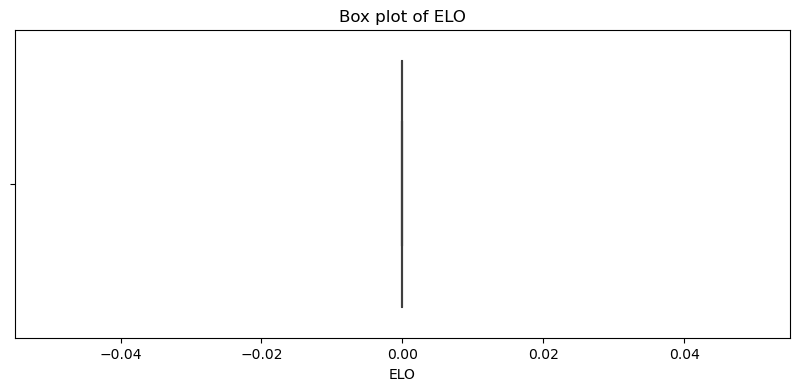

In [7]:
#checking the distribution once again
for column in features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

### Implementing IQR method for handling outliers

In [8]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return filtered_data


for column_name in features:
    data = remove_outliers_iqr(data, column_name)

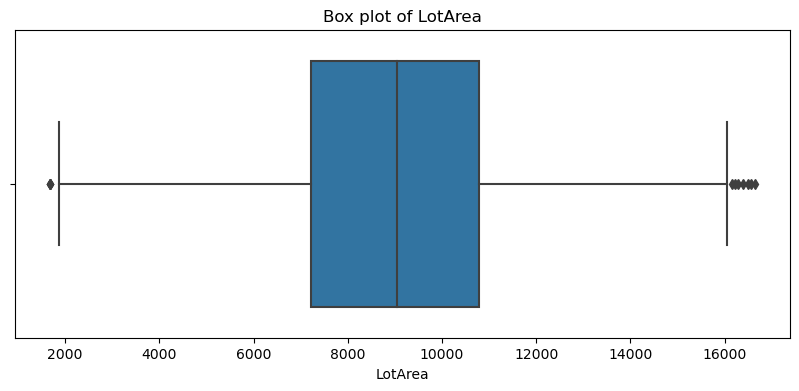

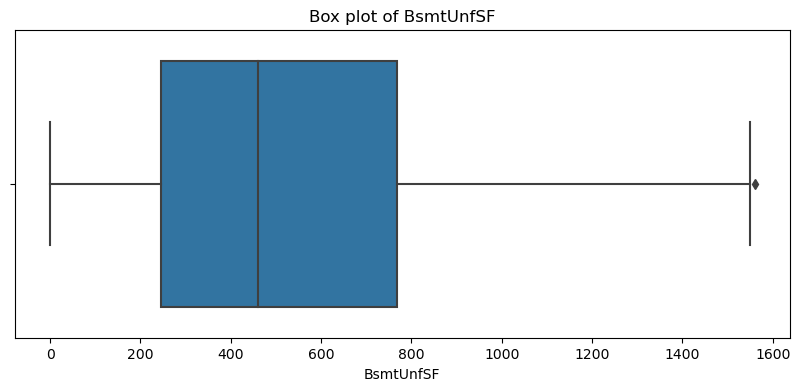

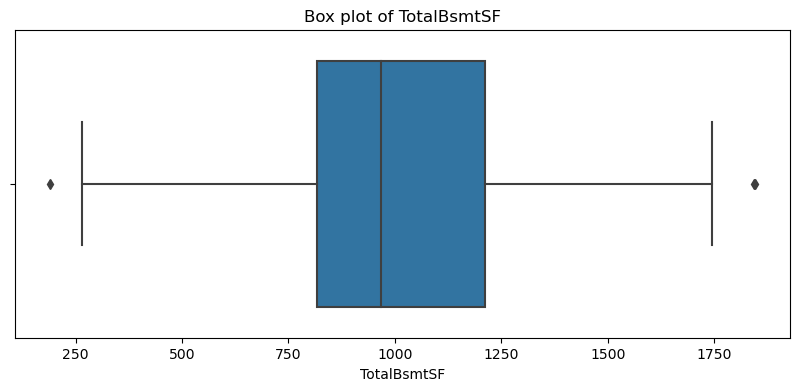

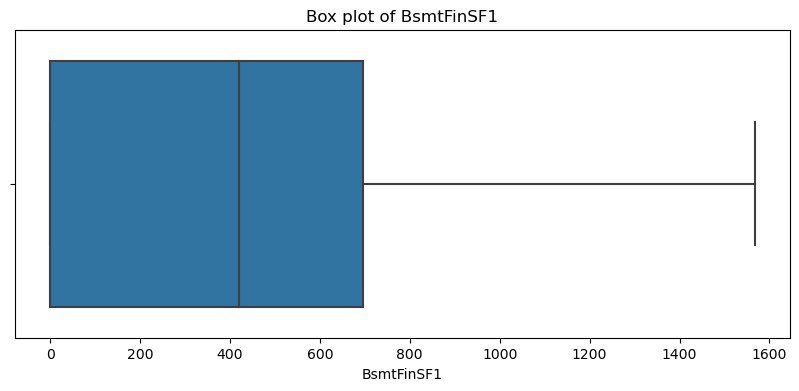

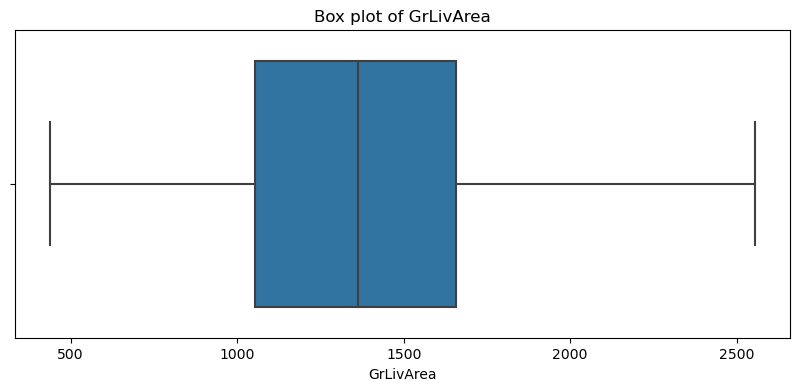

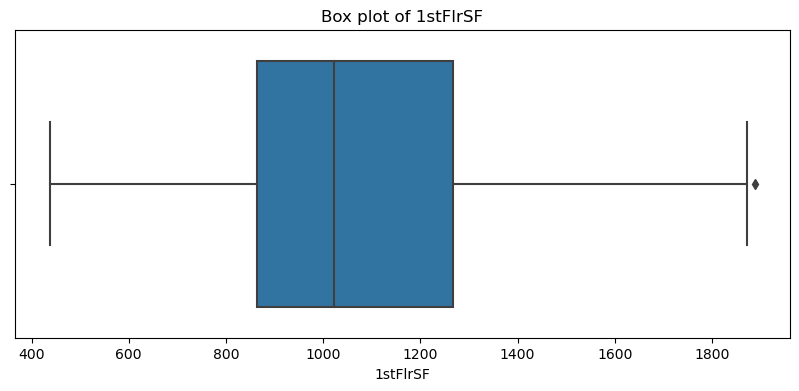

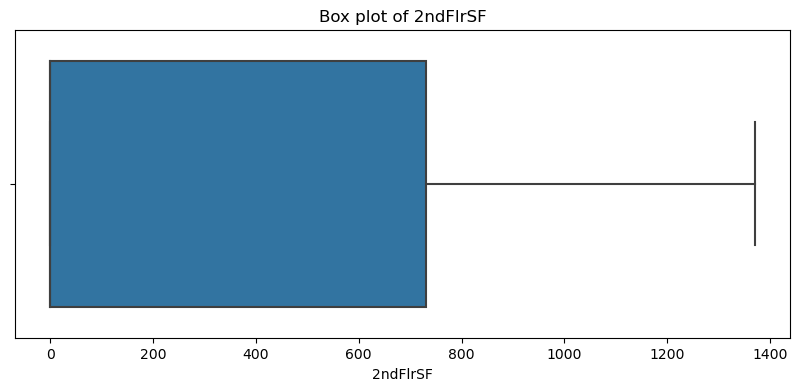

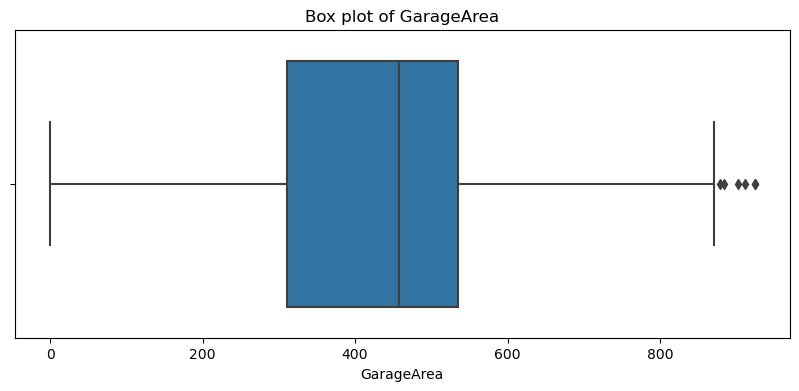

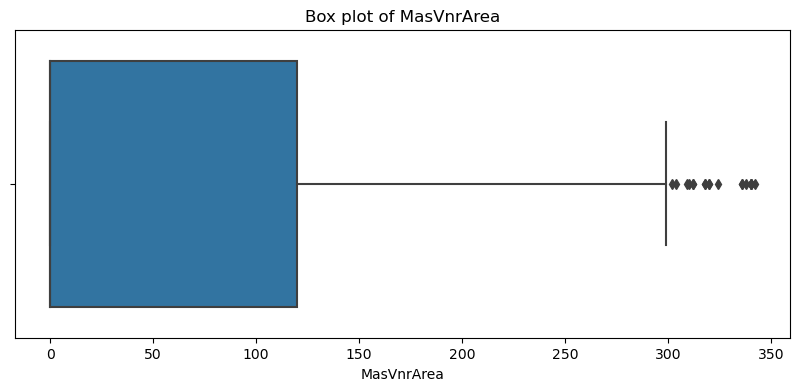

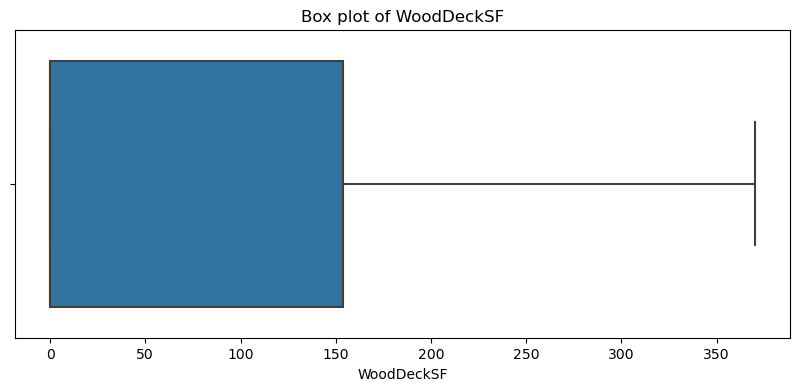

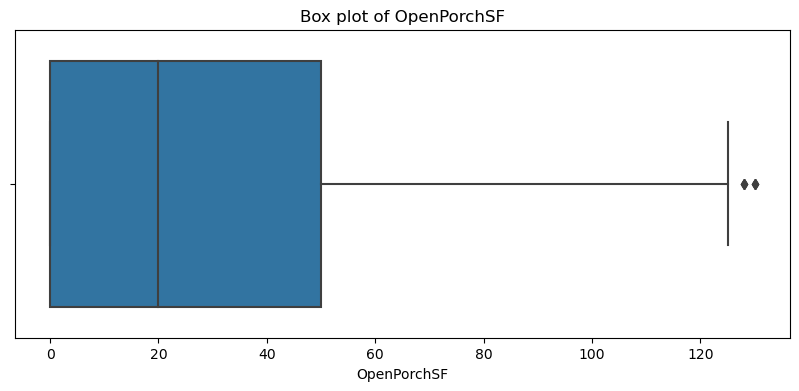

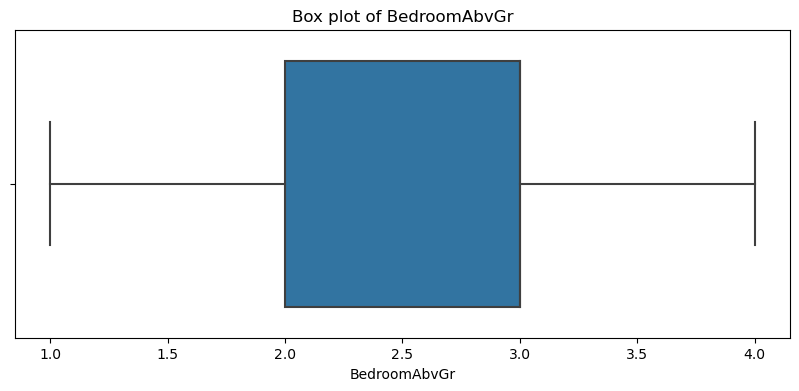

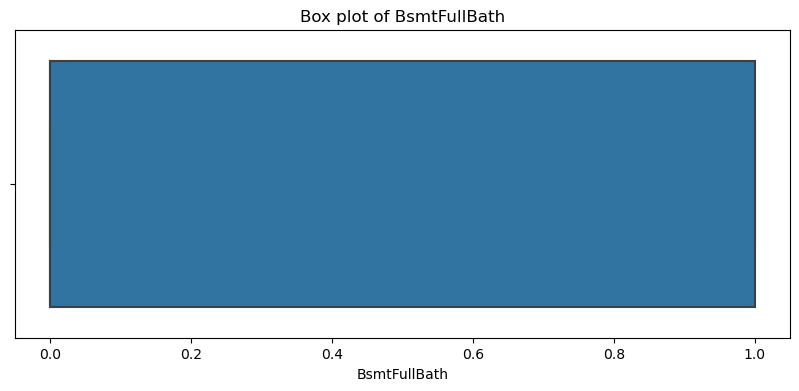

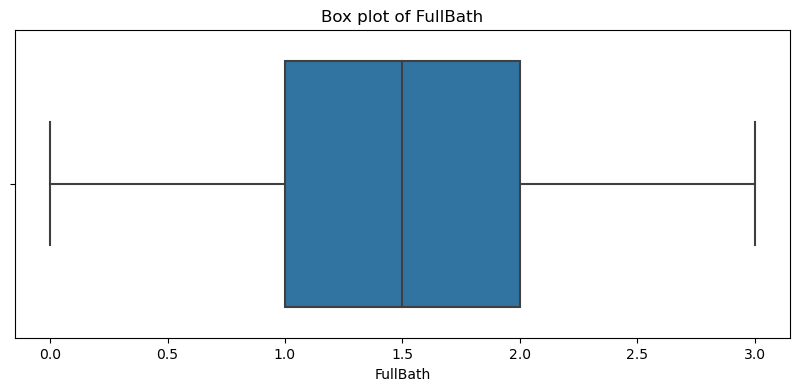

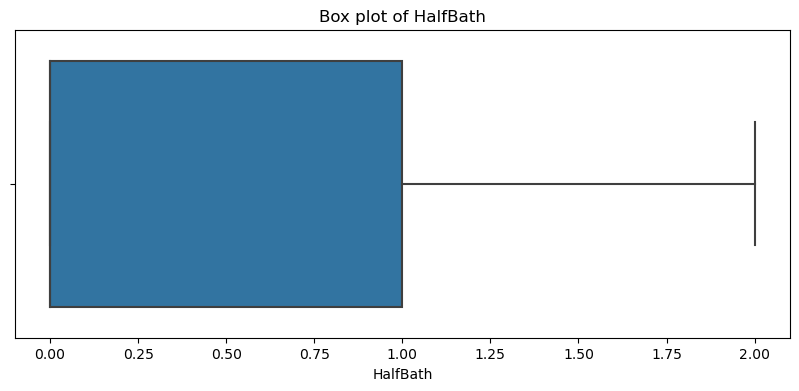

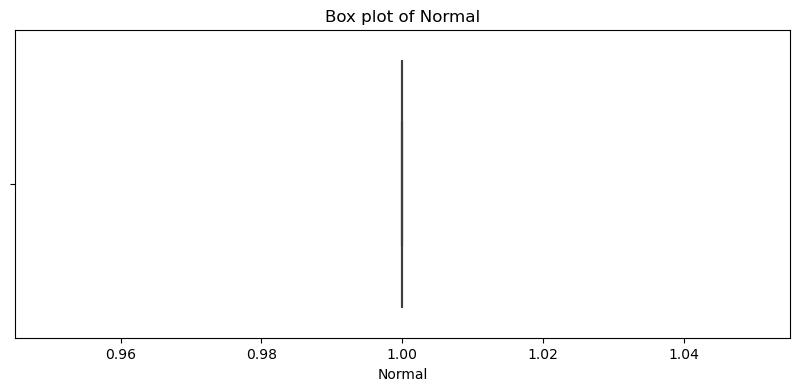

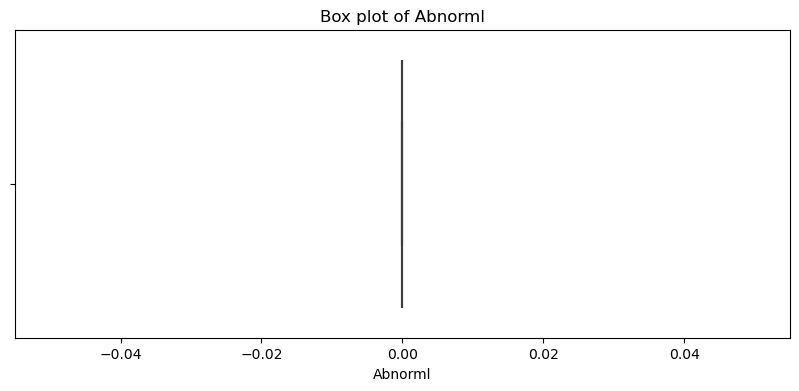

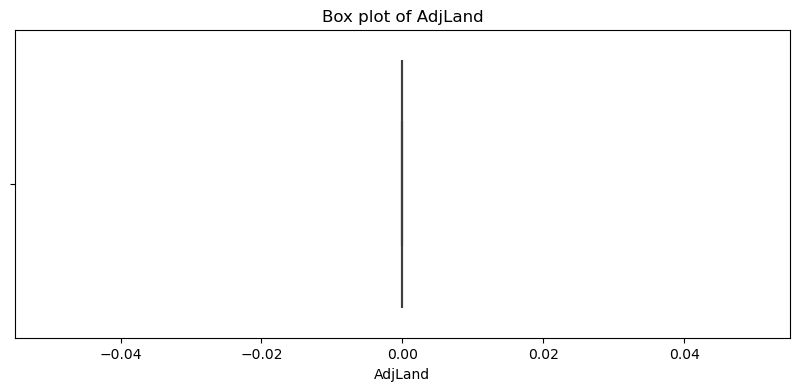

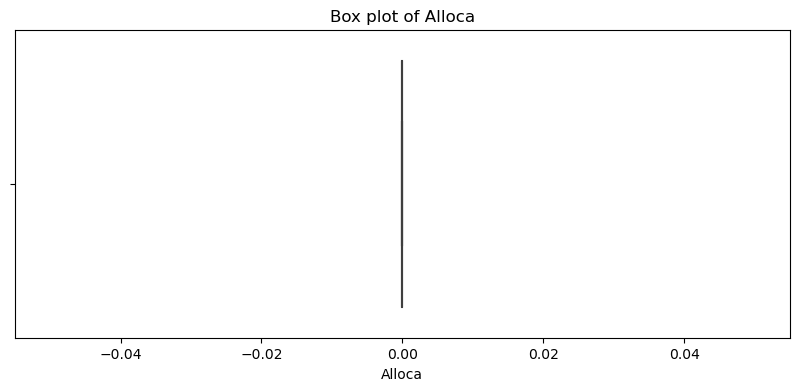

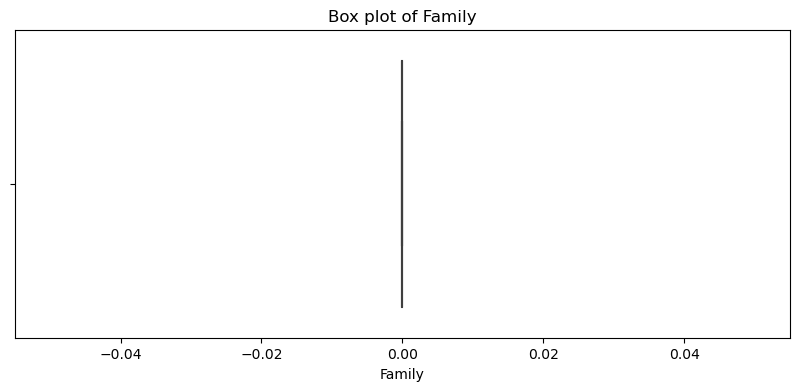

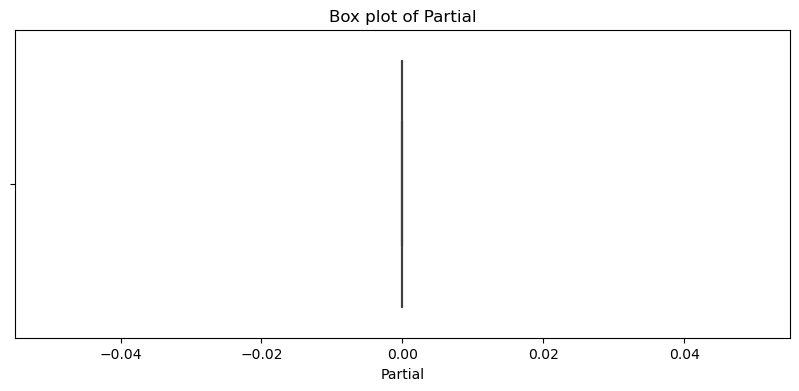

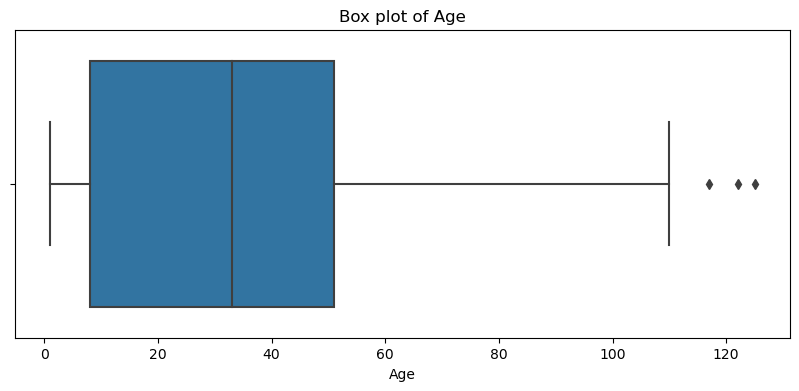

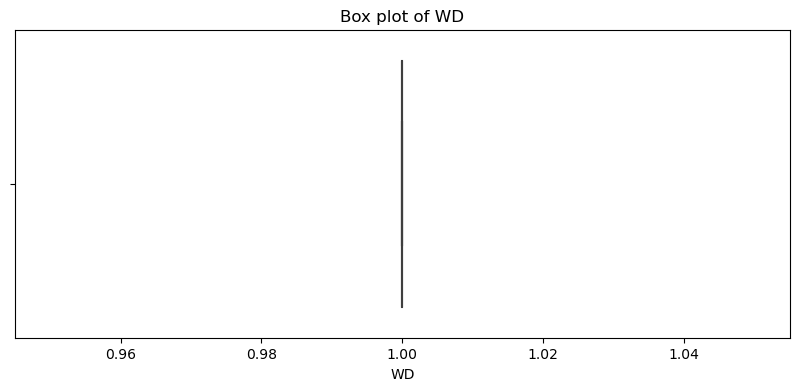

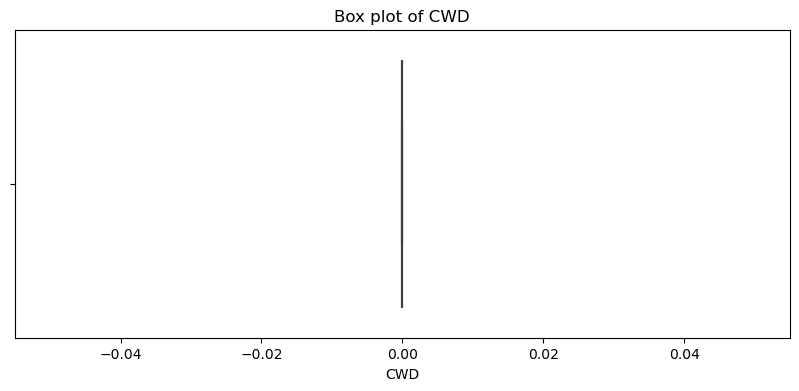

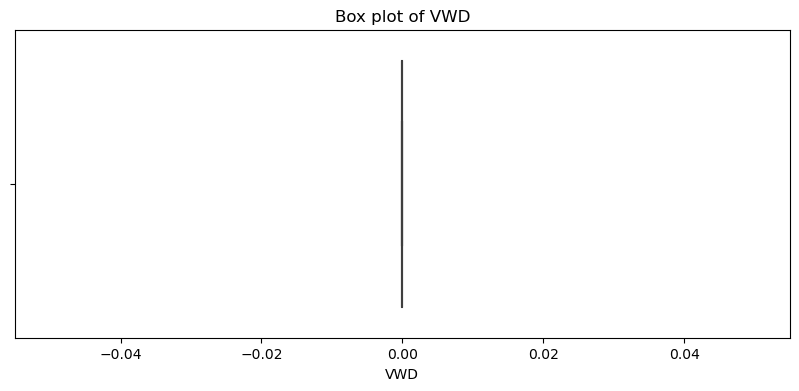

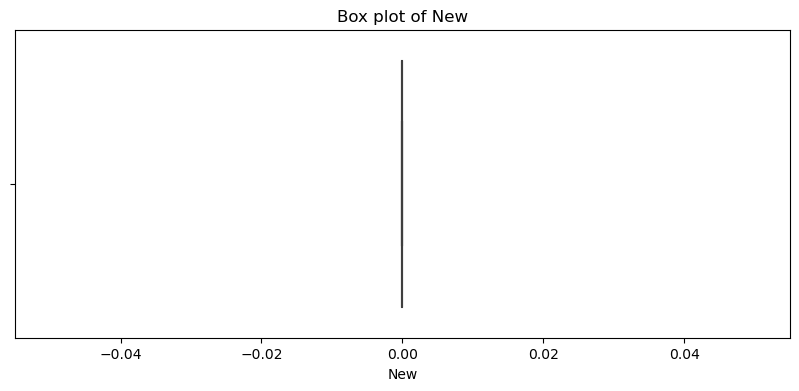

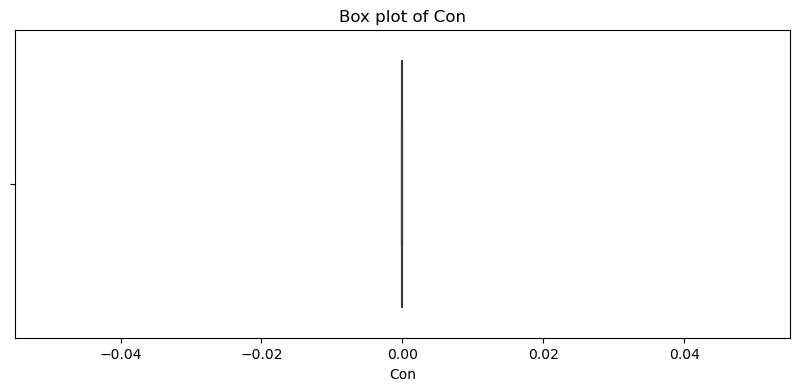

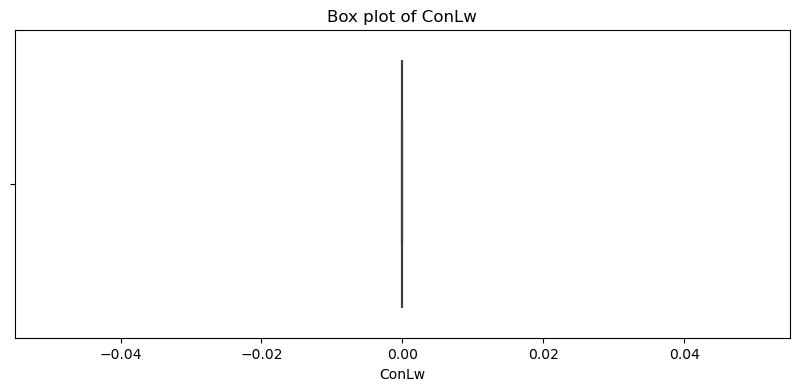

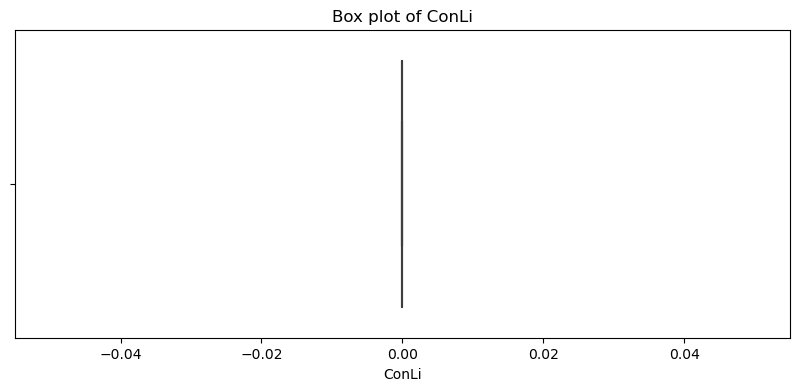

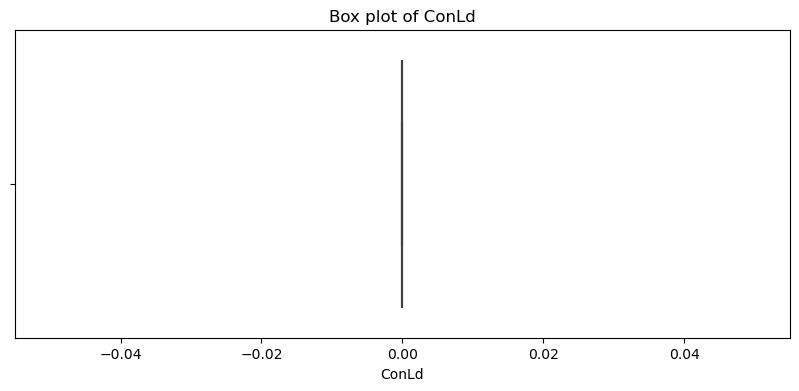

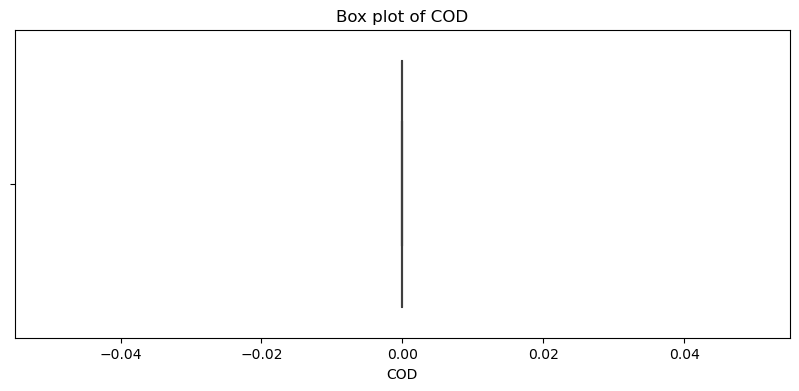

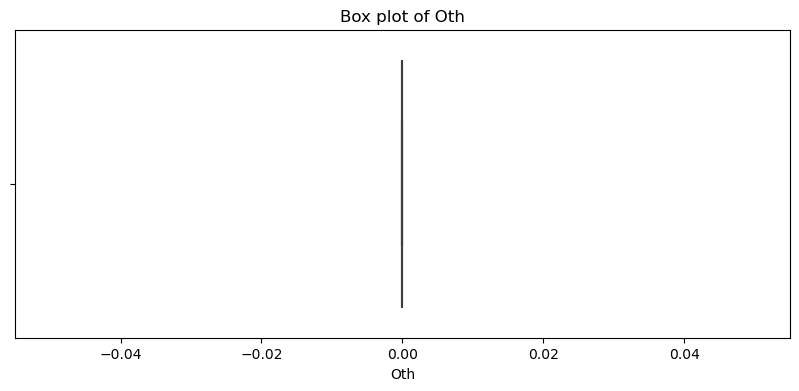

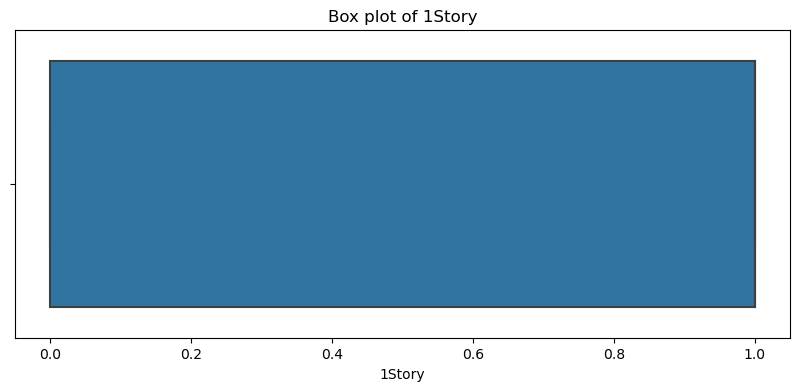

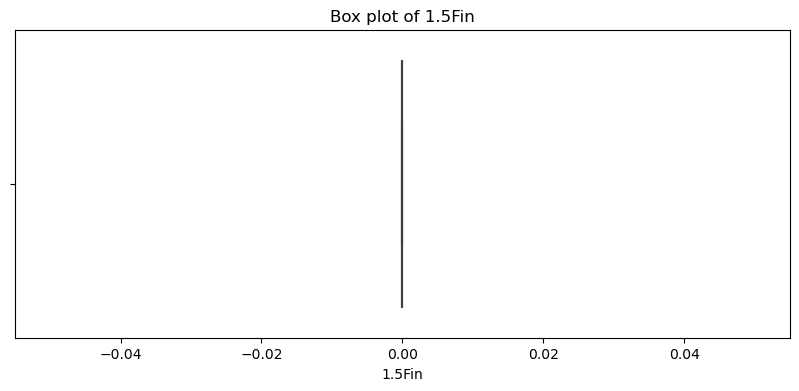

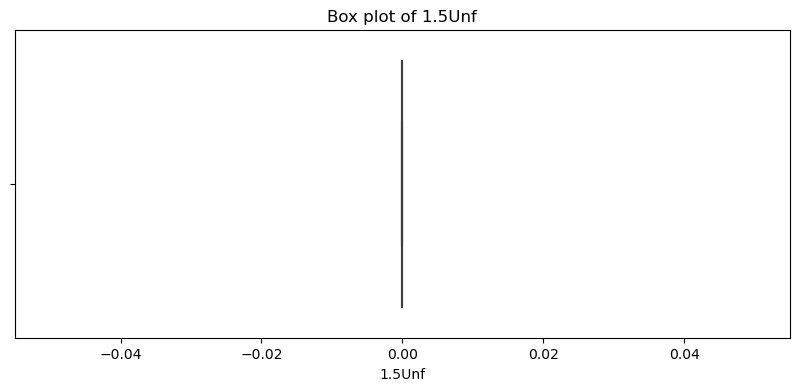

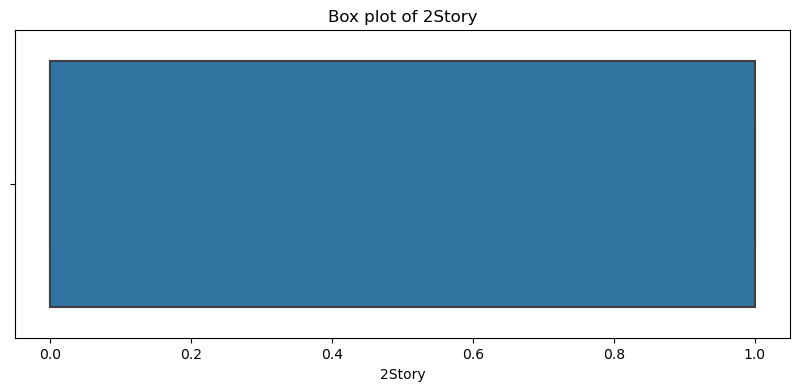

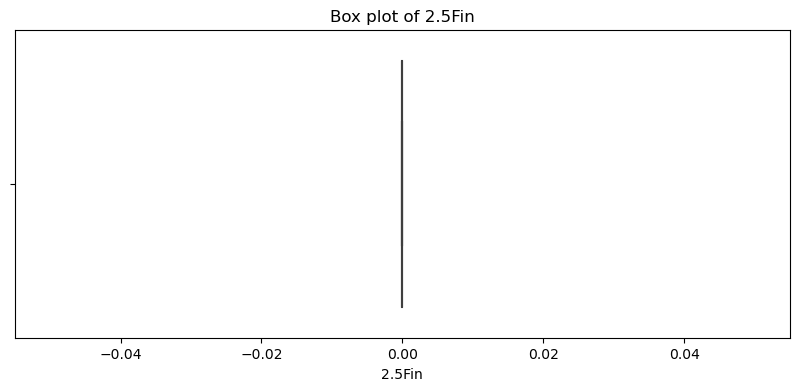

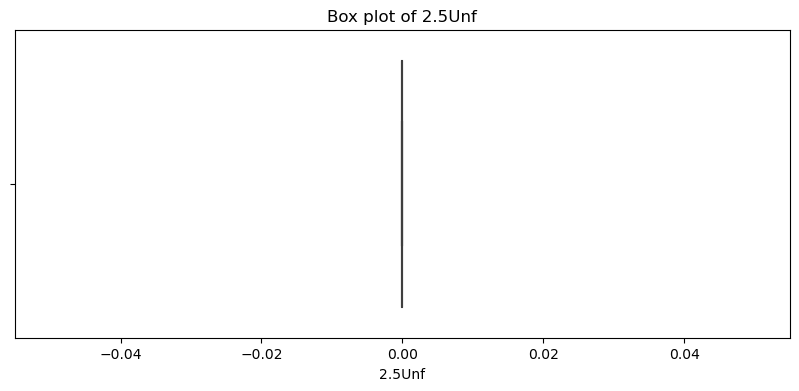

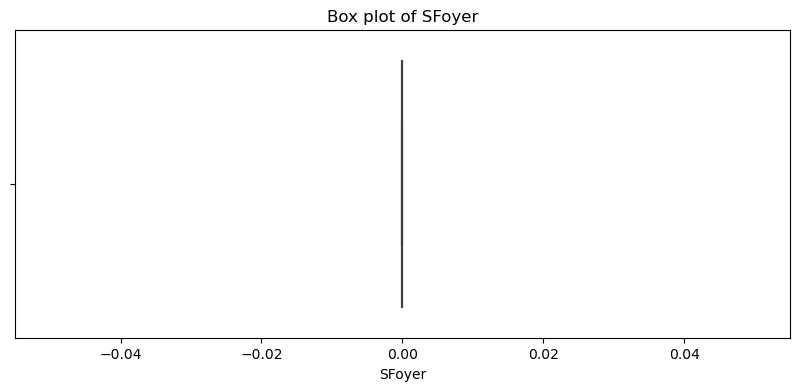

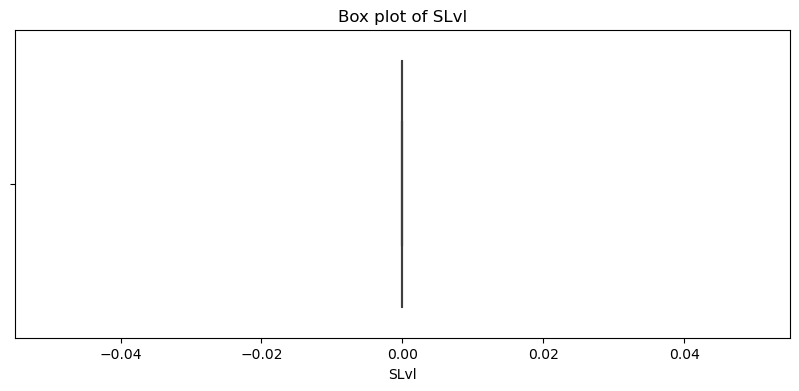

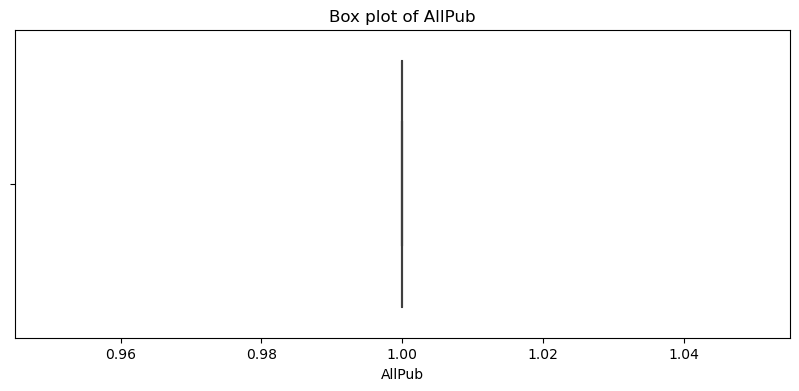

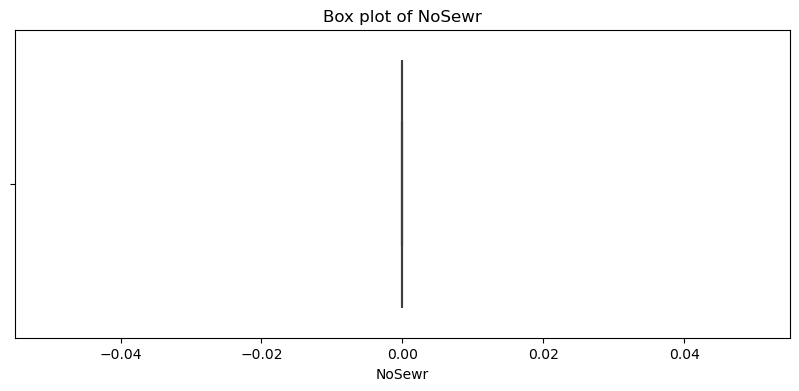

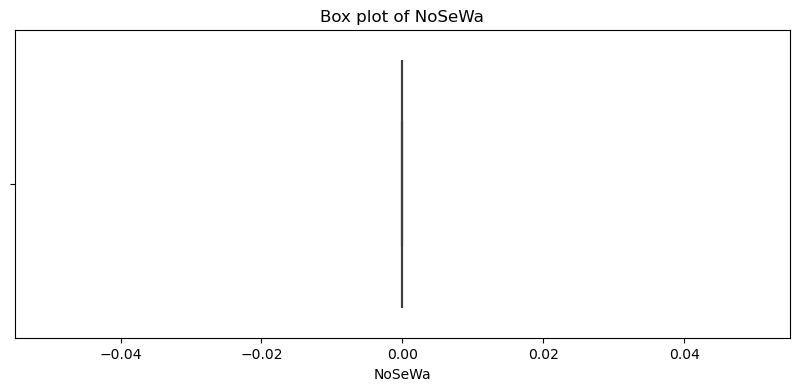

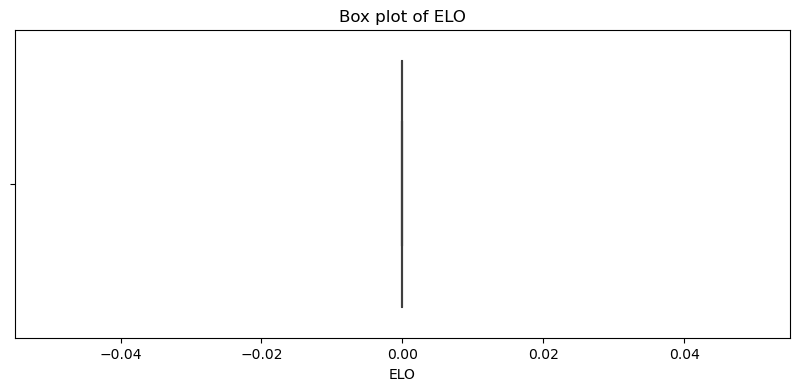

In [9]:
#checking the distribution once again after IQR
for column in features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

### Checking for Null values

In [10]:
def fill_missing_values(data, features):
    for feature in features:
        fill_value = data[feature].median()
        data[feature].fillna(fill_value, inplace=True)
    return data


data = fill_missing_values(data, features)

In [11]:
for i in features:
    if data[i].isna().sum():
        print(i)

# Training the model

## Model incorporation

In [12]:
#setting the source and target attributes

x=data[features]
y=data['SalePrice']

#importing the LR
model = LinearRegression()

## Scaling

In [13]:
mask = ~np.isnan(x).any(axis=1)
x = x[mask]

# Initialize MinMaxScaler
scaler = MinMaxScaler()


# Scale the features
x_scaled = scaler.fit_transform(x)

## Splitting

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [15]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred=model.predict(x_test)

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 18443.436919377495
Mean Squared Error (MSE): 642010000.2937075
Root Mean Squared Error (RMSE): 25337.916257926725
R-squared (R²): 0.7795244209516947


C:\Users\revan\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(data):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]
    X_train = train_data[features]
    y_train = train_data['SalePrice']
    X_test = test_data[features]
    y_test = test_data['SalePrice']

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)

avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)


print(f"Average Mean Squared Error (MSE) across {num_folds} folds: {avg_mse}")
print(f"Average R-squared (R²) across {num_folds} folds: {avg_r2}")

Average Mean Squared Error (MSE) across 5 folds: 511118835.4134043
Average R-squared (R²) across 5 folds: 0.8125434883521019


# Application of model

In [19]:
testData=pd.read_csv('test.csv')

addNewFeatures(testData)

testData = fill_missing_values(testData, features)

FinalPred=model.predict(testData[features])

In [20]:
ids = testData['Id']

predictions_df = pd.DataFrame({
    'Id': ids,
    'SalePrice': FinalPred
})

print(predictions_df.head())

predictions_df.to_csv('predictions.csv', index=False)  # Save predictions to a CSV file

     Id      SalePrice
0  1461  142031.881616
1  1462  181327.325000
2  1463  212414.287101
3  1464  203772.551863
4  1465  169773.701493


# Predictions are saved in a csv file